# High level view over RL and its applications

## Reinforcement Learning
RL is the study of agents and how they learn by trial and error. It formalizes the idea that rewarding or punishing an agent for its behavior makes it more likely to repeat or forego that behavior in the future.

RL methods have recently enjoyed a wide variety of successes. For example, it’s been used to teach computers to control robots in simulation...

It’s also famously been used to create breakthrough AIs for sophisticated strategy games, most notably Go and Dota, taught computers to play Atari games from raw pixels, and trained simulated robots to follow human instructions.

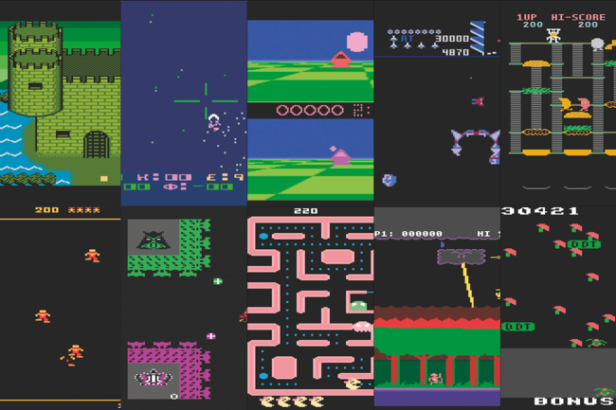

## Terminologies and Key Concepts

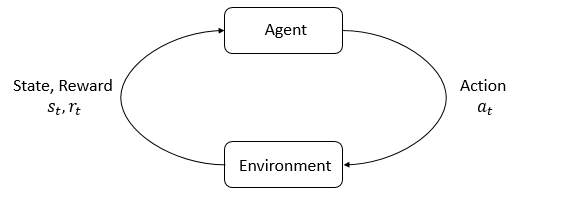

The main characters of RL are the agent and the environment. The environment is the world that the agent lives in and interacts with. At every step of interaction, the agent sees a (possibly partial) observation of the state of the world, and then decides on an action to take. The environment changes when the agent acts on it, but may also change on its own.

The agent also perceives a reward signal from the environment, a number that tells it how good or bad the current world state is. The goal of the agent is to maximize its cumulative reward, called return. Reinforcement learning methods are ways that the agent can learn behaviors to achieve its goal.


### States and Observations

A state s is a complete description of the state of the world. There is no information about the world which is hidden from the state. An observation o is a partial description of a state, which may omit information.

In deep RL, we almost always represent states and observations by a real-valued vector, matrix, or higher-order tensor. For instance, a visual observation could be represented by the RGB matrix of its pixel values; the state of a robot might be represented by its joint angles and velocities.

When the agent is able to observe the complete state of the environment, we say that the environment is fully observed. When the agent can only see a partial observation, we say that the environment is partially observed.

## Action Spaces

Different environments allow different kinds of actions. The set of all valid actions in a given environment is often called the action space. Some environments, like Atari and Go, have discrete action spaces, where only a finite number of moves are available to the agent. Other environments, like where the agent controls a robot in a physical world, have continuous action spaces. In continuous spaces, actions are real-valued vectors.

This distinction has some quite-profound consequences for methods in deep RL. Some families of algorithms can only be directly applied in one case, and would have to be substantially reworked for the other.


## Policies

A policy is a rule used by an agent to decide what actions to take. It can be deterministic or Stochastic.
In deep RL, we deal with parameterized policies: policies whose outputs are computable functions that depend on a set of parameters (eg the weights and biases of a neural network) which we can adjust to change the behavior via some optimization algorithm.

## Reward

The reward function R is critically important in reinforcement learning. It depends on the current state of the world, the action just taken, and the next state of the world. The goal of the agent is to maximize some notion of cumulative reward over a trajectory which is a sequence of states and actions in the world.

### For further knowledge I recommend checking this link
https://spinningup.openai.com/en/latest/spinningup/rl_intro.html

# Libraries Illustration and code Implementation

## GYM
Gym is an open source Python library for developing and comparing reinforcement learning algorithms by providing a standard API to communicate between learning algorithms and environments, as well as a standard set of environments compliant with that API. Since its release, Gym's API has become the field standard for doing this.

Gym documentation website is at https://www.gymlibrary.ml/, and you can propose fixes and changes to it here.

## Stable Baseline3
Stable Baselines3 (SB3) is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is the next major version of Stable Baselines.

Github repository: https://github.com/DLR-RM/stable-baselines3

Paper: https://jmlr.org/papers/volume22/20-1364/20-1364.pdf

Main Features¶

    Unified structure for all algorithms
    PEP8 compliant (unified code style)
    Documented functions and classes
    Tests, high code coverage and type hints
    Clean code
    Tensorboard support
    The performance of each algorithm was tested (see Results section in their respective page)

In [2]:
import os
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [3]:
def run_env(env, episode):
    for episode in range(1, episode+1):
        state = env.reset() # random initial state for the environment
        done = False
        score = 0 # cumuative reward
        
        while not done:
            env.render()
            action = env.action_space.sample()
            new_state, reward, done, info = env.step(action)
            score += reward
        print("Episode:{} with Score:{}".format(episode, score))

In [4]:
def display_env(env):
    print("\nInitial state: {}\n".format(env.reset()))
    print("Action space: {}\n".format(env.action_space))
    print("Observation space: {}\n".format(env.observation_space))

In [5]:
def wrap_vec(env):
    return DummyVecEnv([lambda:env])

In [6]:
def close_env(env):
    env.close()

In [13]:
env = gym.make("LunarLander-v2")
display_env(env)
run_env(env, 3)
close_env(env)


Initial state: [-0.0015007   1.4186755  -0.15201566  0.3446826   0.00174567  0.0344338
  0.          0.        ]

Action space: Discrete(4)

Observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)

Episode:1 with Score:-528.4276082196102
Episode:2 with Score:-124.94801349180162
Episode:3 with Score:-267.4355614494183


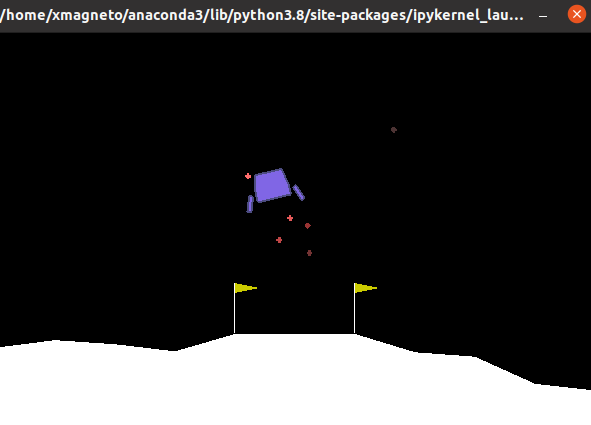

In [14]:
env = gym.make("MountainCar-v0")
display_env(env)
run_env(env, 3)
close_env(env)


Initial state: [-0.4465498  0.       ]

Action space: Discrete(3)

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

Episode:1 with Score:-200.0
Episode:2 with Score:-200.0
Episode:3 with Score:-200.0


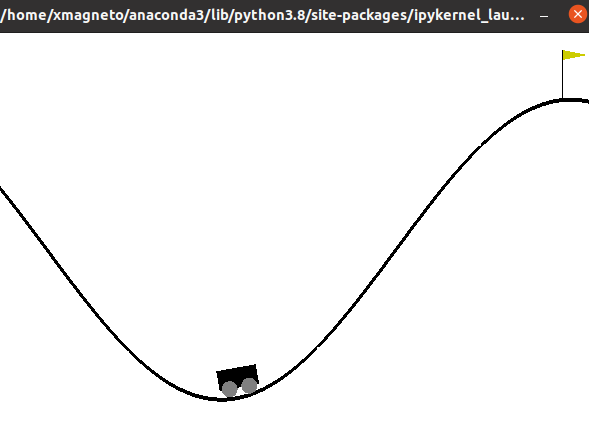

## Different RL algorithms

This table displays the rl algorithms that are implemented in the Stable Baselines3 project, along with some useful characteristics: support for discrete/continuous actions, multiprocessing.
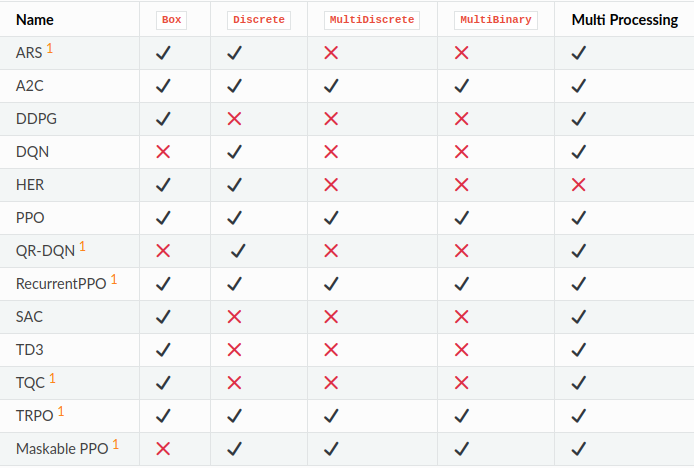


## Model-Free vs Model-Based RL

One of the most important branching points in an RL algorithm is the question of whether the agent has access to (or learns) a model of the environment. By a model of the environment, we mean a function which predicts state transitions and rewards.

The main upside to having a model is that it allows the agent to plan by thinking ahead, seeing what would happen for a range of possible choices, and explicitly deciding between its options. Agents can then distill the results from planning ahead into a learned policy. A particularly famous example of this approach is AlphaZero. When this works, it can result in a substantial improvement in sample efficiency over methods that don’t have a model.

The main downside is that a ground-truth model of the environment is usually not available to the agent. If an agent wants to use a model in this case, it has to learn the model purely from experience, which creates several challenges. The biggest challenge is that bias in the model can be exploited by the agent, resulting in an agent which performs well with respect to the learned model, but behaves sub-optimally (or super terribly) in the real environment. Model-learning is fundamentally hard, so even intense effort—being willing to throw lots of time and compute at it—can fail to pay off.

Algorithms which use a model are called model-based methods, and those that don’t are called model-free. While model-free methods forego the potential gains in sample efficiency from using a model, they tend to be easier to implement and tune. As of the time of writing this introduction (September 2018), model-free methods are more popular and have been more extensively developed and tested than model-based methods.


## Model Training

In [15]:
log_path = os.path.join('Training', 'Logs')
print(log_path)

Training/Logs


In [38]:
env = gym.make("CartPole-v1")
display_env(env)
wrap_vec(env)
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path) # Multi layer perceptron NN as policy or agent


Initial state: [0.03549451 0.01255405 0.01312108 0.04119935]

Action space: Discrete(2)

Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [39]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_13
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | 21.2     |
| time/              |          |
|    fps             | 2466     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.1        |
|    ep_rew_mean          | 28.1        |
| time/                   |             |
|    fps                  | 1641        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007907006 |
|    clip_fraction        | 0.0905      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00339    

## Saving the Model

In [18]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_CartPole_Model')
model.save(ppo_path)

In [19]:
del model
model = PPO.load(ppo_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Model Evaluation

In [40]:
# the env without the model runs first
dummy_env = gym.make("CartPole-v1")
run_env(dummy_env, 5)
close_env(dummy_env)
# after applying the trained model
evaluate_policy(model, env, n_eval_episodes=2, render=True)
close_env(env)

Episode:1 with Score:10.0
Episode:2 with Score:14.0
Episode:3 with Score:30.0
Episode:4 with Score:14.0
Episode:5 with Score:23.0


/home/xmagneto/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


## Testing our Model

In [27]:
def test_model(env, episode, model):
    for episode in range(1, episode+1):
        obs = env.reset()
        done = False 
        score = 0
        
        while not done:
            env.render()
            action , _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            score += reward
        print("Episode:{} with Score:{}".format(episode, score))        
    close_env(env)

In [42]:
test_model(env, 5, model)

Episode:1 with Score:115.0
Episode:2 with Score:376.0
Episode:3 with Score:500.0
Episode:4 with Score:129.0
Episode:5 with Score:500.0


Now the model was able to successfully balance the pole
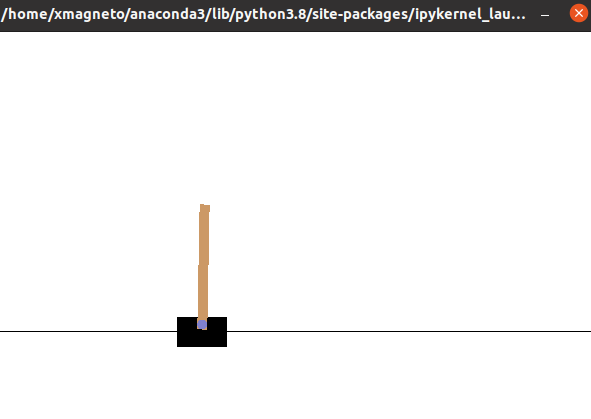

## View the Logs using tensorboard

In [33]:
training_log = os.path.join(log_path, 'PPO_1')
training_log

'Training/Logs/PPO_1'

In [34]:
!tensorboard --logdir={training_log}

2022-08-01 17:27:48.907385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xmagneto/anaconda3/lib/python3.8/site-packages/cv2/../../lib64::/home/xmagneto/.mujoco/mujoco210/bin
2022-08-01 17:27:48.907416: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-01 17:27:50.375550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xmagneto/anaconda3/lib/python3.8/site-packages/cv2/../../lib64::/home/xmagneto/.mujoco/mujoco210/bin
2022-08-01 17:27:50.375685: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-01 17:27:

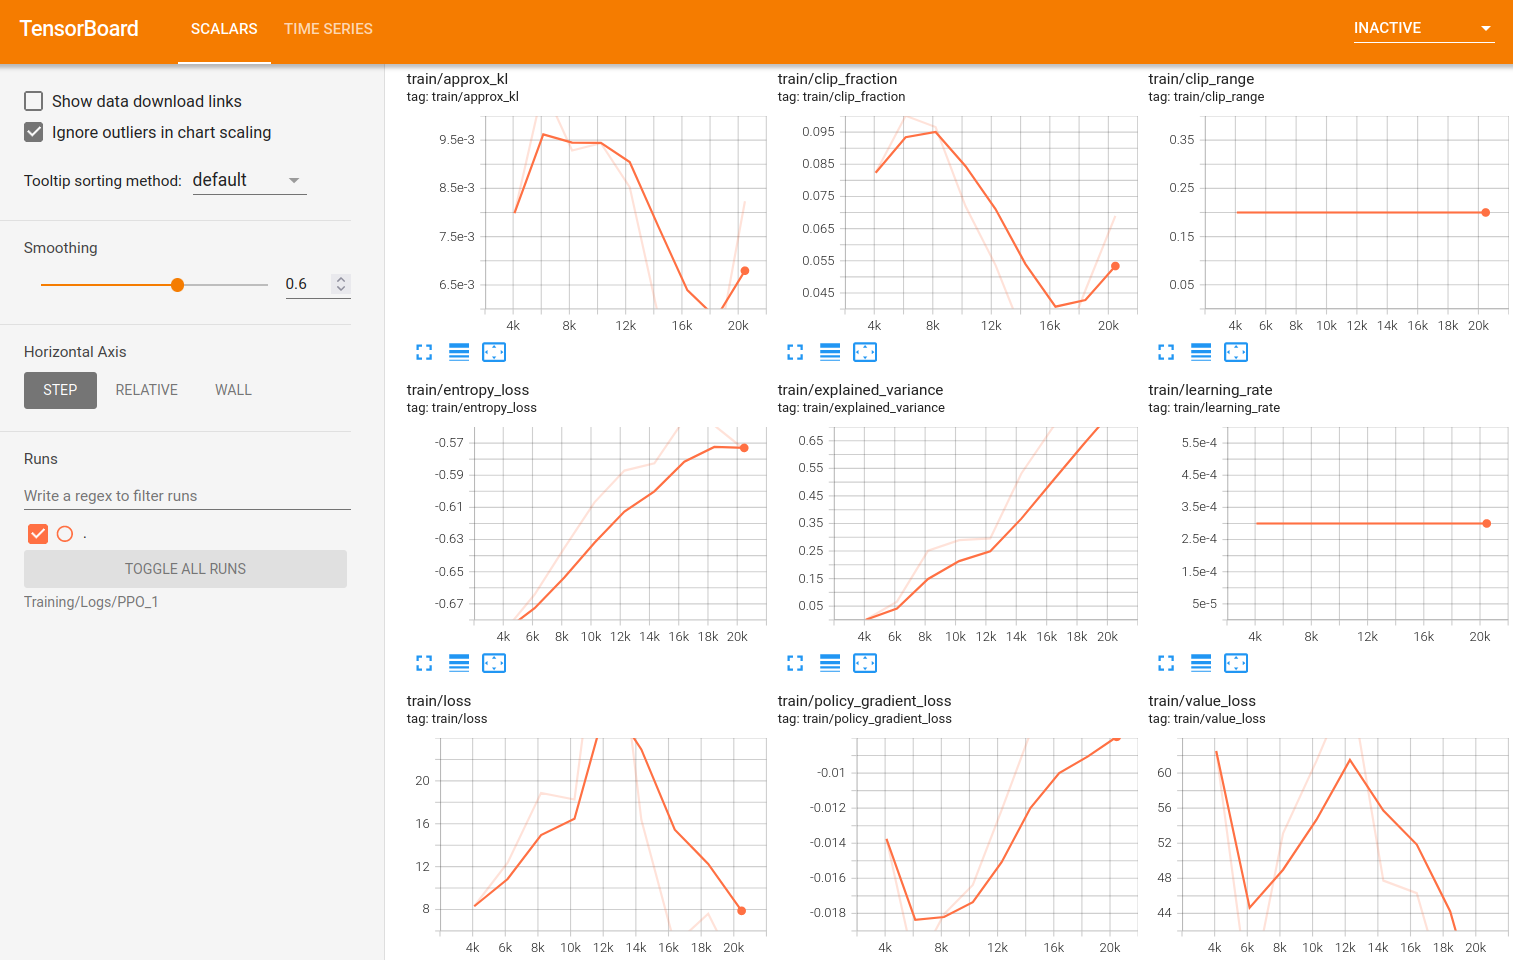

## Using Callbacks at the training stage &  Changing the policy architecture

In [44]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

save_path = os.path.join('Training', 'Best Model Saves')
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=400, verbose=1)
eval_callback = EvalCallback(env, 
                            callback_on_new_best=stop_callback, 
                            eval_freq=1000,
                            best_model_save_path=save_path,
                            verbose=1)

In [45]:
new_arch = [{'pi':[128, 128, 128, 128], 'vf':[128, 128, 128, 128]}]
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path, policy_kwargs={'net_arch':new_arch})
model.learn(total_timesteps=20000, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/PPO_14
Eval num_timesteps=1000, episode_reward=9.80 +/- 0.40
Episode length: 9.80 +/- 0.40
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.8      |
|    mean_reward     | 9.8      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=9.00 +/- 0.89
Episode length: 9.00 +/- 0.89
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9        |
|    mean_reward     | 9        |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | 22.6     |
| time/              |          |
|    fps             | 1857     |
|   

## Using new algorithms (DQN)

In [49]:
from stable_baselines3 import DQN

model = DQN("MlpPolicy", env, verbose = 1, tensorboard_log=log_path)
model.learn(total_timesteps=200000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7133     |
|    time_elapsed     | 0        |
|    total_timesteps  | 93       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7126     |
|    time_elapsed     | 0        |
|    total_timesteps  | 155      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 7972     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1782     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 8062     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1890     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.906    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 8656     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 8677     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3866     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.812    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.732    |
| time/               |          |
|    episodes         | 264      |
|    fps              | 8962     |
|    time_elapsed     | 0        |
|    total_timesteps  | 5646     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.728    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 8967     |
|    time_elapsed     | 0        |
|    total_timesteps  | 5718     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.721    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 352      |
|    fps              | 9158     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7639     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.633    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 9168     |
|    time_elapsed     | 0        |
|    total_timesteps  | 7735     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.629    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.545    |
| time/               |          |
|    episodes         | 440      |
|    fps              | 9234     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9580     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.541    |
| time/               |          |
|    episodes         | 444      |
|    fps              | 9240     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9666     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.537    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.454    |
| time/               |          |
|    episodes         | 528      |
|    fps              | 9199     |
|    time_elapsed     | 1        |
|    total_timesteps  | 11495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.448    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 9209     |
|    time_elapsed     | 1        |
|    total_timesteps  | 11617    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.444    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 23.3     |
|    exploration_rate | 0.357    |
| time/               |          |
|    episodes         | 616      |
|    fps              | 9191     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13541    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.352    |
| time/               |          |
|    episodes         | 620      |
|    fps              | 9196     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13643    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.348    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.266    |
| time/               |          |
|    episodes         | 704      |
|    fps              | 9125     |
|    time_elapsed     | 1        |
|    total_timesteps  | 15444    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.263    |
| time/               |          |
|    episodes         | 708      |
|    fps              | 9122     |
|    time_elapsed     | 1        |
|    total_timesteps  | 15516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.258    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.176    |
| time/               |          |
|    episodes         | 792      |
|    fps              | 8951     |
|    time_elapsed     | 1        |
|    total_timesteps  | 17339    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.172    |
| time/               |          |
|    episodes         | 796      |
|    fps              | 8941     |
|    time_elapsed     | 1        |
|    total_timesteps  | 17426    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.169    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.0944   |
| time/               |          |
|    episodes         | 880      |
|    fps              | 8816     |
|    time_elapsed     | 2        |
|    total_timesteps  | 19065    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.0881   |
| time/               |          |
|    episodes         | 884      |
|    fps              | 8823     |
|    time_elapsed     | 2        |
|    total_timesteps  | 19198    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 20.3     |
|    exploration_rate | 0.0852   |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 8878     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21061    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 8881     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21163    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 8922     |
|    time_elapsed     | 2        |
|    total_timesteps  | 22981    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 8922     |
|    time_elapsed     | 2        |
|    total_timesteps  | 23083    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1144     |
|    fps              | 8917     |
|    time_elapsed     | 2        |
|    total_timesteps  | 24848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 8909     |
|    time_elapsed     | 2        |
|    total_timesteps  | 24940    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1232     |
|    fps              | 8895     |
|    time_elapsed     | 3        |
|    total_timesteps  | 26696    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 8894     |
|    time_elapsed     | 3        |
|    total_timesteps  | 26788    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1320     |
|    fps              | 8803     |
|    time_elapsed     | 3        |
|    total_timesteps  | 28645    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 8803     |
|    time_elapsed     | 3        |
|    total_timesteps  | 28741    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1408     |
|    fps              | 8783     |
|    time_elapsed     | 3        |
|    total_timesteps  | 30650    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 8781     |
|    time_elapsed     | 3        |
|    total_timesteps  | 30756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 8684     |
|    time_elapsed     | 3        |
|    total_timesteps  | 32461    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 8680     |
|    time_elapsed     | 3        |
|    total_timesteps  | 32534    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 8705     |
|    time_elapsed     | 3        |
|    total_timesteps  | 34400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 8707     |
|    time_elapsed     | 3        |
|    total_timesteps  | 34482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1672     |
|    fps              | 8721     |
|    time_elapsed     | 4        |
|    total_timesteps  | 36247    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 8721     |
|    time_elapsed     | 4        |
|    total_timesteps  | 36311    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 8779     |
|    time_elapsed     | 4        |
|    total_timesteps  | 38231    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 8779     |
|    time_elapsed     | 4        |
|    total_timesteps  | 38308    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 8808     |
|    time_elapsed     | 4        |
|    total_timesteps  | 40123    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 8808     |
|    time_elapsed     | 4        |
|    total_timesteps  | 40178    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1936     |
|    fps              | 8795     |
|    time_elapsed     | 4        |
|    total_timesteps  | 42004    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 8791     |
|    time_elapsed     | 4        |
|    total_timesteps  | 42090    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 8810     |
|    time_elapsed     | 4        |
|    total_timesteps  | 44028    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 8813     |
|    time_elapsed     | 5        |
|    total_timesteps  | 44112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2112     |
|    fps              | 8843     |
|    time_elapsed     | 5        |
|    total_timesteps  | 45916    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 8845     |
|    time_elapsed     | 5        |
|    total_timesteps  | 46043    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2200     |
|    fps              | 8802     |
|    time_elapsed     | 5        |
|    total_timesteps  | 47846    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 8802     |
|    time_elapsed     | 5        |
|    total_timesteps  | 47919    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2288     |
|    fps              | 8789     |
|    time_elapsed     | 5        |
|    total_timesteps  | 49665    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2292     |
|    fps              | 8791     |
|    time_elapsed     | 5        |
|    total_timesteps  | 49777    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2356     |
|    fps              | 8214     |
|    time_elapsed     | 6        |
|    total_timesteps  | 50602    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.158    |
|    n_updates        | 150      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 15.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2360     |
|    fps              | 8178     |
|    time_elapsed     | 6        |
|    total_timesteps  | 50644    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2420     |
|    fps              | 7712     |
|    time_elapsed     | 6        |
|    total_timesteps  | 51241    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0124   |
|    n_updates        | 310      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2424     |
|    fps              | 7682     |
|    time_elapsed     | 6        |
|    total_timesteps  | 51281    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0229   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 12       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2484     |
|    fps              | 7154     |
|    time_elapsed     | 7        |
|    total_timesteps  | 52083    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00745  |
|    n_updates        | 520      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 12.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2488     |
|    fps              | 7126     |
|    time_elapsed     | 7        |
|    total_timesteps  | 52130    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00281  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2548     |
|    fps              | 6789     |
|    time_elapsed     | 7        |
|    total_timesteps  | 52759    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00082  |
|    n_updates        | 689      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2552     |
|    fps              | 6770     |
|    time_elapsed     | 7        |
|    total_timesteps  | 52799    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000952 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2612     |
|    fps              | 6455     |
|    time_elapsed     | 8        |
|    total_timesteps  | 53379    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000314 |
|    n_updates        | 844      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2616     |
|    fps              | 6435     |
|    time_elapsed     | 8        |
|    total_timesteps  | 53416    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000453 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2676     |
|    fps              | 6184     |
|    time_elapsed     | 8        |
|    total_timesteps  | 53994    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00035  |
|    n_updates        | 998      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2680     |
|    fps              | 6163     |
|    time_elapsed     | 8        |
|    total_timesteps  | 54044    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000166 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.63     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2740     |
|    fps              | 5937     |
|    time_elapsed     | 9        |
|    total_timesteps  | 54611    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000238 |
|    n_updates        | 1152     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.59     |
|    ep_rew_mean      | 9.59     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 5920     |
|    time_elapsed     | 9        |
|    total_timesteps  | 54650    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000215 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.54     |
|    ep_rew_mean      | 9.54     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2804     |
|    fps              | 5725     |
|    time_elapsed     | 9        |
|    total_timesteps  | 55226    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000221 |
|    n_updates        | 1306     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 9.57     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2808     |
|    fps              | 5713     |
|    time_elapsed     | 9        |
|    total_timesteps  | 55265    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0005   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 9.68     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2868     |
|    fps              | 5527     |
|    time_elapsed     | 10       |
|    total_timesteps  | 55845    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000654 |
|    n_updates        | 1461     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2872     |
|    fps              | 5515     |
|    time_elapsed     | 10       |
|    total_timesteps  | 55888    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000154 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2932     |
|    fps              | 5352     |
|    time_elapsed     | 10       |
|    total_timesteps  | 56454    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000549 |
|    n_updates        | 1613     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2936     |
|    fps              | 5341     |
|    time_elapsed     | 10       |
|    total_timesteps  | 56490    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.51     |
|    ep_rew_mean      | 9.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2996     |
|    fps              | 5185     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57069    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000633 |
|    n_updates        | 1767     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.53     |
|    ep_rew_mean      | 9.53     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 5176     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57110    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000531 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3060     |
|    fps              | 5033     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57695    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000211 |
|    n_updates        | 1923     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3064     |
|    fps              | 5024     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57738    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000128 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3124     |
|    fps              | 4887     |
|    time_elapsed     | 11       |
|    total_timesteps  | 58315    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000218 |
|    n_updates        | 2078     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3128     |
|    fps              | 4878     |
|    time_elapsed     | 11       |
|    total_timesteps  | 58353    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000778 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 9.68     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3188     |
|    fps              | 4762     |
|    time_elapsed     | 12       |
|    total_timesteps  | 58934    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000507 |
|    n_updates        | 2233     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.67     |
|    ep_rew_mean      | 9.67     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 4755     |
|    time_elapsed     | 12       |
|    total_timesteps  | 58970    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000368 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3252     |
|    fps              | 4648     |
|    time_elapsed     | 12       |
|    total_timesteps  | 59544    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000258 |
|    n_updates        | 2385     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3256     |
|    fps              | 4640     |
|    time_elapsed     | 12       |
|    total_timesteps  | 59581    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000395 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3316     |
|    fps              | 4517     |
|    time_elapsed     | 13       |
|    total_timesteps  | 60155    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0711   |
|    n_updates        | 2538     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.53     |
|    ep_rew_mean      | 9.53     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3320     |
|    fps              | 4510     |
|    time_elapsed     | 13       |
|    total_timesteps  | 60195    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0787   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3380     |
|    fps              | 4387     |
|    time_elapsed     | 13       |
|    total_timesteps  | 60844    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0037   |
|    n_updates        | 2710     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3384     |
|    fps              | 4380     |
|    time_elapsed     | 13       |
|    total_timesteps  | 60884    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0257   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3444     |
|    fps              | 4281     |
|    time_elapsed     | 14       |
|    total_timesteps  | 61463    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0596   |
|    n_updates        | 2865     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3448     |
|    fps              | 4274     |
|    time_elapsed     | 14       |
|    total_timesteps  | 61503    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0298   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.67     |
|    ep_rew_mean      | 9.67     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3508     |
|    fps              | 4184     |
|    time_elapsed     | 14       |
|    total_timesteps  | 62079    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0301   |
|    n_updates        | 3019     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3512     |
|    fps              | 4178     |
|    time_elapsed     | 14       |
|    total_timesteps  | 62117    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3572     |
|    fps              | 4097     |
|    time_elapsed     | 15       |
|    total_timesteps  | 62705    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00941  |
|    n_updates        | 3176     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.72     |
|    ep_rew_mean      | 9.72     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3576     |
|    fps              | 4091     |
|    time_elapsed     | 15       |
|    total_timesteps  | 62745    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0465   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3636     |
|    fps              | 4014     |
|    time_elapsed     | 15       |
|    total_timesteps  | 63316    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0387   |
|    n_updates        | 3328     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3640     |
|    fps              | 4009     |
|    time_elapsed     | 15       |
|    total_timesteps  | 63359    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0136   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.6      |
|    ep_rew_mean      | 9.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3700     |
|    fps              | 3938     |
|    time_elapsed     | 16       |
|    total_timesteps  | 63935    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00926  |
|    n_updates        | 3483     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 3933     |
|    time_elapsed     | 16       |
|    total_timesteps  | 63976    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00786  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3764     |
|    fps              | 3865     |
|    time_elapsed     | 16       |
|    total_timesteps  | 64561    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0353   |
|    n_updates        | 3640     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3768     |
|    fps              | 3861     |
|    time_elapsed     | 16       |
|    total_timesteps  | 64598    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0122   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3828     |
|    fps              | 3797     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65183    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates        | 3795     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.63     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3832     |
|    fps              | 3793     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65222    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0221   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3892     |
|    fps              | 3735     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65812    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0198   |
|    n_updates        | 3952     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3896     |
|    fps              | 3731     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65849    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0246   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3956     |
|    fps              | 3677     |
|    time_elapsed     | 18       |
|    total_timesteps  | 66500    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00774  |
|    n_updates        | 4124     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3960     |
|    fps              | 3673     |
|    time_elapsed     | 18       |
|    total_timesteps  | 66539    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00387  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4020     |
|    fps              | 3615     |
|    time_elapsed     | 18       |
|    total_timesteps  | 67140    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0203   |
|    n_updates        | 4284     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4024     |
|    fps              | 3611     |
|    time_elapsed     | 18       |
|    total_timesteps  | 67179    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0204   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4084     |
|    fps              | 3560     |
|    time_elapsed     | 19       |
|    total_timesteps  | 67770    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0316   |
|    n_updates        | 4442     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4088     |
|    fps              | 3556     |
|    time_elapsed     | 19       |
|    total_timesteps  | 67809    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0578   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 9.68     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4148     |
|    fps              | 3507     |
|    time_elapsed     | 19       |
|    total_timesteps  | 68382    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0208   |
|    n_updates        | 4595     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4152     |
|    fps              | 3504     |
|    time_elapsed     | 19       |
|    total_timesteps  | 68421    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0385   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.39     |
|    ep_rew_mean      | 9.39     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4212     |
|    fps              | 3457     |
|    time_elapsed     | 19       |
|    total_timesteps  | 68976    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0148   |
|    n_updates        | 4743     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.36     |
|    ep_rew_mean      | 9.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4216     |
|    fps              | 3454     |
|    time_elapsed     | 19       |
|    total_timesteps  | 69012    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0205   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.46     |
|    ep_rew_mean      | 9.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4276     |
|    fps              | 3411     |
|    time_elapsed     | 20       |
|    total_timesteps  | 69584    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0299   |
|    n_updates        | 4895     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.46     |
|    ep_rew_mean      | 9.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4280     |
|    fps              | 3408     |
|    time_elapsed     | 20       |
|    total_timesteps  | 69622    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00814  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4340     |
|    fps              | 3365     |
|    time_elapsed     | 20       |
|    total_timesteps  | 70203    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.079    |
|    n_updates        | 5050     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4344     |
|    fps              | 3362     |
|    time_elapsed     | 20       |
|    total_timesteps  | 70246    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.13     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4404     |
|    fps              | 3318     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70875    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.085    |
|    n_updates        | 5218     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4408     |
|    fps              | 3316     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70912    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00573  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4468     |
|    fps              | 3276     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71538    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0806   |
|    n_updates        | 5384     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4472     |
|    fps              | 3274     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71579    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00573  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4532     |
|    fps              | 3239     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72147    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.04     |
|    n_updates        | 5536     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4536     |
|    fps              | 3236     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72183    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0811   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4596     |
|    fps              | 3198     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72811    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.037    |
|    n_updates        | 5702     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4600     |
|    fps              | 3196     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72852    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0755   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4660     |
|    fps              | 3160     |
|    time_elapsed     | 23       |
|    total_timesteps  | 73468    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0484   |
|    n_updates        | 5866     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4664     |
|    fps              | 3158     |
|    time_elapsed     | 23       |
|    total_timesteps  | 73512    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0509   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4724     |
|    fps              | 3124     |
|    time_elapsed     | 23       |
|    total_timesteps  | 74105    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0515   |
|    n_updates        | 6026     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4728     |
|    fps              | 3122     |
|    time_elapsed     | 23       |
|    total_timesteps  | 74144    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0233   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4788     |
|    fps              | 3090     |
|    time_elapsed     | 24       |
|    total_timesteps  | 74747    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.021    |
|    n_updates        | 6186     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4792     |
|    fps              | 3087     |
|    time_elapsed     | 24       |
|    total_timesteps  | 74787    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4852     |
|    fps              | 3058     |
|    time_elapsed     | 24       |
|    total_timesteps  | 75364    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0233   |
|    n_updates        | 6340     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.74     |
|    ep_rew_mean      | 9.74     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4856     |
|    fps              | 3056     |
|    time_elapsed     | 24       |
|    total_timesteps  | 75402    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00967  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4916     |
|    fps              | 3024     |
|    time_elapsed     | 25       |
|    total_timesteps  | 76016    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.104    |
|    n_updates        | 6503     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4920     |
|    fps              | 3022     |
|    time_elapsed     | 25       |
|    total_timesteps  | 76052    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00437  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4980     |
|    fps              | 2993     |
|    time_elapsed     | 25       |
|    total_timesteps  | 76651    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0682   |
|    n_updates        | 6662     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4984     |
|    fps              | 2991     |
|    time_elapsed     | 25       |
|    total_timesteps  | 76690    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0546   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5044     |
|    fps              | 2963     |
|    time_elapsed     | 26       |
|    total_timesteps  | 77294    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0465   |
|    n_updates        | 6823     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5048     |
|    fps              | 2961     |
|    time_elapsed     | 26       |
|    total_timesteps  | 77331    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0578   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5108     |
|    fps              | 2929     |
|    time_elapsed     | 26       |
|    total_timesteps  | 77921    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.114    |
|    n_updates        | 6980     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 2927     |
|    time_elapsed     | 26       |
|    total_timesteps  | 77963    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00374  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5172     |
|    fps              | 2894     |
|    time_elapsed     | 27       |
|    total_timesteps  | 78543    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.193    |
|    n_updates        | 7135     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5176     |
|    fps              | 2892     |
|    time_elapsed     | 27       |
|    total_timesteps  | 78583    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00351  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5236     |
|    fps              | 2860     |
|    time_elapsed     | 27       |
|    total_timesteps  | 79203    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.03     |
|    n_updates        | 7300     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5240     |
|    fps              | 2857     |
|    time_elapsed     | 27       |
|    total_timesteps  | 79241    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0337   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5300     |
|    fps              | 2827     |
|    time_elapsed     | 28       |
|    total_timesteps  | 79862    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0304   |
|    n_updates        | 7465     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5304     |
|    fps              | 2825     |
|    time_elapsed     | 28       |
|    total_timesteps  | 79901    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5364     |
|    fps              | 2742     |
|    time_elapsed     | 29       |
|    total_timesteps  | 81721    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.091    |
|    n_updates        | 7930     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5368     |
|    fps              | 2735     |
|    time_elapsed     | 29       |
|    total_timesteps  | 81908    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00575  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5428     |
|    fps              | 2512     |
|    time_elapsed     | 35       |
|    total_timesteps  | 90288    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0517   |
|    n_updates        | 10071    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5432     |
|    fps              | 2499     |
|    time_elapsed     | 36       |
|    total_timesteps  | 90927    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0927   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 180      |
|    ep_rew_mean      | 180      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5492     |
|    fps              | 2265     |
|    time_elapsed     | 45       |
|    total_timesteps  | 103207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.194    |
|    n_updates        | 13301    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | 183      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5496     |
|    fps              | 2251     |
|    time_elapsed     | 46       |
|    total_timesteps  | 104100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.119    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 224      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5556     |
|    fps              | 2093     |
|    time_elapsed     | 56       |
|    total_timesteps  | 117852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0405   |
|    n_updates        | 16962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 225      |
|    ep_rew_mean      | 225      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5560     |
|    fps              | 2080     |
|    time_elapsed     | 57       |
|    total_timesteps  | 118835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 240      |
|    ep_rew_mean      | 240      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5620     |
|    fps              | 1952     |
|    time_elapsed     | 68       |
|    total_timesteps  | 132965   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.28     |
|    n_updates        | 20741    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 241      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5624     |
|    fps              | 1945     |
|    time_elapsed     | 68       |
|    total_timesteps  | 133916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0105   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 242      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5684     |
|    fps              | 1870     |
|    time_elapsed     | 79       |
|    total_timesteps  | 148540   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.147    |
|    n_updates        | 24634    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 240      |
|    ep_rew_mean      | 240      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5688     |
|    fps              | 1867     |
|    time_elapsed     | 80       |
|    total_timesteps  | 149396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.157    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 234      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5748     |
|    fps              | 1823     |
|    time_elapsed     | 89       |
|    total_timesteps  | 163175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0068   |
|    n_updates        | 28293    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 235      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5752     |
|    fps              | 1820     |
|    time_elapsed     | 90       |
|    total_timesteps  | 164289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0828   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 217      |
|    ep_rew_mean      | 217      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5812     |
|    fps              | 1788     |
|    time_elapsed     | 98       |
|    total_timesteps  | 176808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0237   |
|    n_updates        | 31701    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 219      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5816     |
|    fps              | 1783     |
|    time_elapsed     | 99       |
|    total_timesteps  | 177973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.236    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 224      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5876     |
|    fps              | 1748     |
|    time_elapsed     | 109      |
|    total_timesteps  | 191765   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.023    |
|    n_updates        | 35441    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 224      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5880     |
|    fps              | 1747     |
|    time_elapsed     | 110      |
|    total_timesteps  | 192566   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.321    |
|    n_updates      

In [50]:
test_model(env, 5, model)

Episode:1 with Score:185.0
Episode:2 with Score:367.0
Episode:3 with Score:196.0
Episode:4 with Score:173.0
Episode:5 with Score:204.0


# Projects phase
###### Now we move from the phase of playing around with environments and different types of models and we will go through the process of solving specific types of problems

## Atari Games(The Breakout Problem)
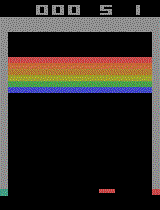

In [63]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.env_util import make_atari_env

In [53]:
# exploring the environment
breakout_env = gym.make("ALE/Breakout-v5")
display_env(breakout_env)
run_env(breakout_env, 5)
close_env(breakout_env)


Initial state: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Action space: Discrete(4)

Observation space: Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]



In [60]:
# Vectorizing the environment

breakout_env = make_atari_env('Breakout-v0', n_envs=4, seed=0)
breakout_env = VecFrameStack(breakout_env, n_stack=4)

In [64]:
log_path = os.path.join('Training', 'Logs')
model = A2C("CnnPolicy", breakout_env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=300000)

In [65]:
# Now we load the model alerady trained 
model = A2C.load(os.path.join('Training', 'Saved Models', 'A2C_300k_model.zip'))

/home/xmagneto/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(


In [67]:
breakout_env = make_atari_env('Breakout-v0', n_envs=1, seed=0)
breakout_env = VecFrameStack(breakout_env, n_stack=4)
evaluate_policy(model, breakout_env, n_eval_episodes=50, render=True)
close_env(breakout_env)

## RL for Autonomous Driving
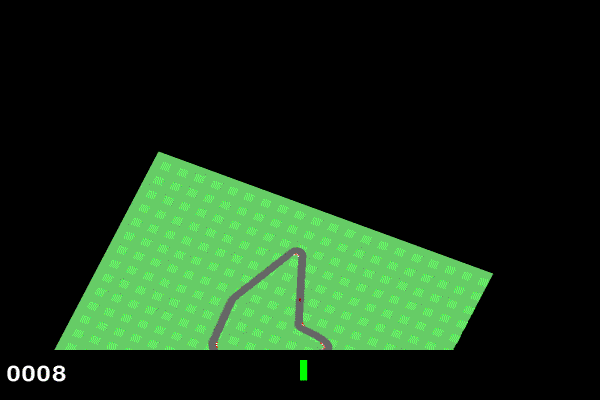

In [8]:
# exploring the environment
car_racing = gym.make("CarRacing-v0")
display_env(car_racing)
run_env(car_racing, 2)
close_env(car_racing)

Track generation: 1147..1438 -> 291-tiles track

Initial state: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Action space: Box([-1.  0.  0.], [1. 1. 1.], (3,), float32)

Observation space: Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255

In [9]:
car_racing = wrap_vec(car_racing)

In [10]:
log_path = os.path.join('Training', 'Logs')
model = PPO('CnnPolicy', car_racing, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [18]:
model.learn(total_timesteps=2000000)

Track generation: 1308..1639 -> 331-tiles track
Logging to Training/Logs/PPO_15
Track generation: 1048..1314 -> 266-tiles track
Track generation: 1180..1479 -> 299-tiles track
-----------------------------
| time/              |      |
|    fps             | 88   |
|    iterations      | 1    |
|    time_elapsed    | 23   |
|    total_timesteps | 2048 |
-----------------------------
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1128..1414 -> 286-tiles track
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 2            |
|    time_elapsed         | 56           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062556174 |
|    clip_fraction        | 0.0573       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.24        |
|    explained_variance   | 0.0133       |
| 

Track generation: 1284..1609 -> 325-tiles track
Track generation: 1133..1420 -> 287-tiles track
-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 11          |
|    time_elapsed         | 339         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.027469132 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.04       |
|    explained_variance   | 0.717       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0414     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0273     |
|    std                  | 0.925       |
|    value_loss           | 0.104       |
-----------------------------------------
Track generation: 1071..1343 -> 272-tiles track
Track generation: 1092..1369 -> 277-tiles track
----------

Track generation: 1159..1453 -> 294-tiles track
-----------------------------------------
| time/                   |             |
|    fps                  | 64          |
|    iterations           | 20          |
|    time_elapsed         | 631         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.028456774 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.93       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0352     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0284     |
|    std                  | 0.897       |
|    value_loss           | 0.0618      |
-----------------------------------------
Track generation: 1247..1563 -> 316-tiles track
Track generation: 1151..1442 -> 291-tiles track
Track generation: 1323..1658 -> 335-tiles track
----------

Track generation: 1149..1440 -> 291-tiles track
Track generation: 1179..1478 -> 299-tiles track
-----------------------------------------
| time/                   |             |
|    fps                  | 64          |
|    iterations           | 30          |
|    time_elapsed         | 952         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.040503576 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.71       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0353     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0328     |
|    std                  | 0.834       |
|    value_loss           | 0.0915      |
-----------------------------------------
Track generation: 1011..1268 -> 257-tiles track
Track generation: 935..1179 -> 244-tiles track
-----------

Track generation: 1066..1341 -> 275-tiles track
Track generation: 959..1206 -> 247-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 39         |
|    time_elapsed         | 1244       |
|    total_timesteps      | 79872      |
| train/                  |            |
|    approx_kl            | 0.07581042 |
|    clip_fraction        | 0.383      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.43      |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0892    |
|    n_updates            | 380        |
|    policy_gradient_loss | -0.0534    |
|    std                  | 0.752      |
|    value_loss           | 0.117      |
----------------------------------------
Track generation: 1152..1444 -> 292-tiles track
Track generation: 1448..1814 -> 366-tiles track
------------------------------

Track generation: 1134..1431 -> 297-tiles track
Track generation: 1178..1477 -> 299-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 49         |
|    time_elapsed         | 1556       |
|    total_timesteps      | 100352     |
| train/                  |            |
|    approx_kl            | 0.15013513 |
|    clip_fraction        | 0.528      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.02      |
|    explained_variance   | 0.952      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0611    |
|    n_updates            | 480        |
|    policy_gradient_loss | -0.0441    |
|    std                  | 0.657      |
|    value_loss           | 0.21       |
----------------------------------------
Track generation: 1157..1450 -> 293-tiles track
Track generation: 1207..1513 -> 306-tiles track
-----------------------------

Track generation: 1061..1330 -> 269-tiles track
Track generation: 1156..1449 -> 293-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 59         |
|    time_elapsed         | 1865       |
|    total_timesteps      | 120832     |
| train/                  |            |
|    approx_kl            | 0.21659812 |
|    clip_fraction        | 0.624      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.77      |
|    explained_variance   | 0.861      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.114      |
|    n_updates            | 580        |
|    policy_gradient_loss | -0.0122    |
|    std                  | 0.609      |
|    value_loss           | 2.62       |
----------------------------------------
Track generation: 1096..1374 -> 278-tiles track
Track generation: 1147..1438 -> 291-tiles track
-----------------------------

Track generation: 1131..1426 -> 295-tiles track
Track generation: 1183..1482 -> 299-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 69         |
|    time_elapsed         | 2174       |
|    total_timesteps      | 141312     |
| train/                  |            |
|    approx_kl            | 0.22743535 |
|    clip_fraction        | 0.605      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.6       |
|    explained_variance   | 0.976      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.124      |
|    n_updates            | 680        |
|    policy_gradient_loss | -0.0108    |
|    std                  | 0.577      |
|    value_loss           | 0.976      |
----------------------------------------
Track generation: 1079..1358 -> 279-tiles track
Track generation: 1040..1304 -> 264-tiles track
-----------------------------

Track generation: 1102..1387 -> 285-tiles track
Track generation: 989..1242 -> 253-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1137..1425 -> 288-tiles track
-----------------------------------------
| time/                   |             |
|    fps                  | 65          |
|    iterations           | 79          |
|    time_elapsed         | 2483        |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.118140325 |
|    clip_fraction        | 0.514       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.52       |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.123       |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.00725    |
|    std                  | 0.565       |
|    value_loss           | 1.05        |
---------------------

Track generation: 1243..1558 -> 315-tiles track
Track generation: 1274..1600 -> 326-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 65         |
|    iterations           | 89         |
|    time_elapsed         | 2792       |
|    total_timesteps      | 182272     |
| train/                  |            |
|    approx_kl            | 0.13246386 |
|    clip_fraction        | 0.534      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.37      |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.117      |
|    n_updates            | 880        |
|    policy_gradient_loss | -0.0164    |
|    std                  | 0.536      |
|    value_loss           | 1.5        |
----------------------------------------
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1041..1314 -> 273-tiles track
-----------------------------

Track generation: 1080..1354 -> 274-tiles track
Track generation: 1232..1544 -> 312-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 65         |
|    iterations           | 99         |
|    time_elapsed         | 3103       |
|    total_timesteps      | 202752     |
| train/                  |            |
|    approx_kl            | 0.12594911 |
|    clip_fraction        | 0.522      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.23      |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0735     |
|    n_updates            | 980        |
|    policy_gradient_loss | -0.0347    |
|    std                  | 0.511      |
|    value_loss           | 1.02       |
----------------------------------------
Track generation: 1080..1360 -> 280-tiles track
Track generation: 1181..1480 -> 299-tiles track
-----------------------------

Track generation: 1215..1523 -> 308-tiles track
Track generation: 1361..1705 -> 344-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 65         |
|    iterations           | 109        |
|    time_elapsed         | 3415       |
|    total_timesteps      | 223232     |
| train/                  |            |
|    approx_kl            | 0.08961105 |
|    clip_fraction        | 0.453      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.02      |
|    explained_variance   | 0.908      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0491     |
|    n_updates            | 1080       |
|    policy_gradient_loss | -0.0244    |
|    std                  | 0.479      |
|    value_loss           | 1.05       |
----------------------------------------
Track generation: 1112..1394 -> 282-tiles track
Track generation: 1251..1573 -> 322-tiles track
-----------------------------

Track generation: 1250..1566 -> 316-tiles track
Track generation: 1172..1469 -> 297-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 119        |
|    time_elapsed         | 3800       |
|    total_timesteps      | 243712     |
| train/                  |            |
|    approx_kl            | 0.10556775 |
|    clip_fraction        | 0.494      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.72      |
|    explained_variance   | 0.846      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.038      |
|    n_updates            | 1180       |
|    policy_gradient_loss | -0.0478    |
|    std                  | 0.434      |
|    value_loss           | 0.849      |
----------------------------------------
Track generation: 1304..1634 -> 330-tiles track
Track generation: 1242..1567 -> 325-tiles track
-----------------------------

Track generation: 1183..1483 -> 300-tiles track
Track generation: 1252..1569 -> 317-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 62        |
|    iterations           | 129       |
|    time_elapsed         | 4195      |
|    total_timesteps      | 264192    |
| train/                  |           |
|    approx_kl            | 0.1589722 |
|    clip_fraction        | 0.564     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.54     |
|    explained_variance   | 0.85      |
|    learning_rate        | 0.0003    |
|    loss                 | 0.123     |
|    n_updates            | 1280      |
|    policy_gradient_loss | -0.027    |
|    std                  | 0.413     |
|    value_loss           | 2.28      |
---------------------------------------
Track generation: 1058..1327 -> 269-tiles track
Track generation: 1179..1477 -> 298-tiles track
----------------------------------------
| time/

Track generation: 1042..1315 -> 273-tiles track
Track generation: 1148..1439 -> 291-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 139        |
|    time_elapsed         | 4564       |
|    total_timesteps      | 284672     |
| train/                  |            |
|    approx_kl            | 0.19832243 |
|    clip_fraction        | 0.535      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.971      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.436      |
|    n_updates            | 1380       |
|    policy_gradient_loss | 0.0104     |
|    std                  | 0.399      |
|    value_loss           | 4.49       |
----------------------------------------
Track generation: 1215..1523 -> 308-tiles track
Track generation: 1112..1394 -> 282-tiles track
-----------------------------

Track generation: 994..1247 -> 253-tiles track
Track generation: 1199..1511 -> 312-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 149        |
|    time_elapsed         | 4952       |
|    total_timesteps      | 305152     |
| train/                  |            |
|    approx_kl            | 0.23050247 |
|    clip_fraction        | 0.619      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.41      |
|    explained_variance   | 0.875      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.612      |
|    n_updates            | 1480       |
|    policy_gradient_loss | 0.0242     |
|    std                  | 0.395      |
|    value_loss           | 7.09       |
----------------------------------------
Track generation: 1100..1379 -> 279-tiles track
Track generation: 1168..1468 -> 300-tiles track
retry to generate track (norma

Track generation: 1240..1554 -> 314-tiles track
Track generation: 1208..1514 -> 306-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 158        |
|    time_elapsed         | 5300       |
|    total_timesteps      | 323584     |
| train/                  |            |
|    approx_kl            | 0.19523552 |
|    clip_fraction        | 0.521      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.168      |
|    n_updates            | 1570       |
|    policy_gradient_loss | -0.00486   |
|    std                  | 0.394      |
|    value_loss           | 2.15       |
----------------------------------------
Track generation: 1071..1343 -> 272-tiles track
Track generation: 1278..1602 -> 324-tiles track
-----------------------------

Track generation: 1156..1449 -> 293-tiles track
Track generation: 981..1237 -> 256-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 168        |
|    time_elapsed         | 5696       |
|    total_timesteps      | 344064     |
| train/                  |            |
|    approx_kl            | 0.23037997 |
|    clip_fraction        | 0.638      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.3       |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.441      |
|    n_updates            | 1670       |
|    policy_gradient_loss | 0.0137     |
|    std                  | 0.382      |
|    value_loss           | 5.33       |
----------------------------------------
Track generation: 1113..1398 -> 285-tiles track
retry to generate track (normal if there are not manyinstances of this message

Track generation: 1251..1568 -> 317-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 177        |
|    time_elapsed         | 6078       |
|    total_timesteps      | 362496     |
| train/                  |            |
|    approx_kl            | 0.20559025 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.218      |
|    n_updates            | 1760       |
|    policy_gradient_loss | 0.00241    |
|    std                  | 0.364      |
|    value_loss           | 2.87       |
----------------------------------------
Track generation: 1227..1538 -> 311-tiles track
Track generation: 1241..1556 -> 315-tiles track
---------------------------------------
| time/                   |          

Track generation: 1244..1559 -> 315-tiles track
Track generation: 1160..1454 -> 294-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 187       |
|    time_elapsed         | 6467      |
|    total_timesteps      | 382976    |
| train/                  |           |
|    approx_kl            | 0.8695089 |
|    clip_fraction        | 0.631     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.887    |
|    explained_variance   | 0.956     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.24      |
|    n_updates            | 1860      |
|    policy_gradient_loss | -0.00675  |
|    std                  | 0.329     |
|    value_loss           | 2.08      |
---------------------------------------
Track generation: 990..1250 -> 260-tiles track
Track generation: 998..1260 -> 262-tiles track
Track generation: 1101..1381 -> 280-tiles track
--

Track generation: 1147..1438 -> 291-tiles track
Track generation: 1176..1474 -> 298-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 197        |
|    time_elapsed         | 6864       |
|    total_timesteps      | 403456     |
| train/                  |            |
|    approx_kl            | 0.30836442 |
|    clip_fraction        | 0.602      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.682     |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0863     |
|    n_updates            | 1960       |
|    policy_gradient_loss | -0.00726   |
|    std                  | 0.307      |
|    value_loss           | 1.02       |
----------------------------------------
Track generation: 1337..1675 -> 338-tiles track
Track generation: 1083..1358 -> 275-tiles track
-----------------------------

Track generation: 1095..1382 -> 287-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 206        |
|    time_elapsed         | 7266       |
|    total_timesteps      | 421888     |
| train/                  |            |
|    approx_kl            | 0.26527318 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.526     |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.116      |
|    n_updates            | 2050       |
|    policy_gradient_loss | 0.0106     |
|    std                  | 0.296      |
|    value_loss           | 1.46       |
----------------------------------------
Track generation: 1174..1479 -> 305-tiles track
Track generation: 1002..1257 -> 255-tiles track
----------------------------------------
| time/                   |         

Track generation: 1229..1540 -> 311-tiles track
Track generation: 940..1183 -> 243-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1145..1435 -> 290-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 216      |
|    time_elapsed         | 7697     |
|    total_timesteps      | 442368   |
| train/                  |          |
|    approx_kl            | 7.126004 |
|    clip_fraction        | 0.767    |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.354   |
|    explained_variance   | 0.906    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.225    |
|    n_updates            | 2150     |
|    policy_gradient_loss | -0.00664 |
|    std                  | 0.277    |
|    value_loss           | 1.65     |
--------------------------------------
Track generation: 1252..1569 -> 317-

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 225        |
|    time_elapsed         | 8022       |
|    total_timesteps      | 460800     |
| train/                  |            |
|    approx_kl            | 0.40893888 |
|    clip_fraction        | 0.551      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.288     |
|    explained_variance   | 0.925      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.106      |
|    n_updates            | 2240       |
|    policy_gradient_loss | 0.0279     |
|    std                  | 0.272      |
|    value_loss           | 1.15       |
----------------------------------------
Track generation: 1158..1452 -> 294-tiles track
Track generation: 1113..1396 -> 283-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1014..1271 -> 257-tiles tra

Track generation: 1193..1496 -> 303-tiles track
Track generation: 1248..1564 -> 316-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 235        |
|    time_elapsed         | 8387       |
|    total_timesteps      | 481280     |
| train/                  |            |
|    approx_kl            | 0.76785696 |
|    clip_fraction        | 0.69       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.114     |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0852     |
|    n_updates            | 2340       |
|    policy_gradient_loss | -0.00258   |
|    std                  | 0.255      |
|    value_loss           | 1.47       |
----------------------------------------
Track generation: 1078..1358 -> 280-tiles track
Track generation: 1085..1368 -> 283-tiles track
-----------------------------

Track generation: 1034..1304 -> 270-tiles track
Track generation: 1157..1450 -> 293-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 245      |
|    time_elapsed         | 8777     |
|    total_timesteps      | 501760   |
| train/                  |          |
|    approx_kl            | 4.662426 |
|    clip_fraction        | 0.719    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.0961   |
|    explained_variance   | 0.965    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.148    |
|    n_updates            | 2440     |
|    policy_gradient_loss | -0.0316  |
|    std                  | 0.238    |
|    value_loss           | 1.41     |
--------------------------------------
Track generation: 1187..1489 -> 302-tiles track
Track generation: 1116..1399 -> 283-tiles track
--------------------------------------
| time/                   | 

Track generation: 1171..1468 -> 297-tiles track
Track generation: 1123..1408 -> 285-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 255        |
|    time_elapsed         | 9219       |
|    total_timesteps      | 522240     |
| train/                  |            |
|    approx_kl            | 0.19839764 |
|    clip_fraction        | 0.566      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.245      |
|    explained_variance   | 0.919      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0621    |
|    n_updates            | 2540       |
|    policy_gradient_loss | -0.00186   |
|    std                  | 0.229      |
|    value_loss           | 0.337      |
----------------------------------------
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1140..1429 -> 289-tiles track
-----------------------------

Track generation: 1238..1551 -> 313-tiles track
Track generation: 971..1220 -> 249-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1227..1545 -> 318-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 265        |
|    time_elapsed         | 9615       |
|    total_timesteps      | 542720     |
| train/                  |            |
|    approx_kl            | 0.28886217 |
|    clip_fraction        | 0.526      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.44       |
|    explained_variance   | 0.807      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0358    |
|    n_updates            | 2640       |
|    policy_gradient_loss | -0.0297    |
|    std                  | 0.212      |
|    value_loss           | 0.181      |
---------------------------------------

Track generation: 1168..1464 -> 296-tiles track
Track generation: 1056..1324 -> 268-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 274        |
|    time_elapsed         | 9988       |
|    total_timesteps      | 561152     |
| train/                  |            |
|    approx_kl            | 0.13583538 |
|    clip_fraction        | 0.468      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.643      |
|    explained_variance   | 0.801      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0569    |
|    n_updates            | 2730       |
|    policy_gradient_loss | -0.0325    |
|    std                  | 0.199      |
|    value_loss           | 0.06       |
----------------------------------------
Track generation: 1012..1269 -> 257-tiles track
Track generation: 1051..1318 -> 267-tiles track
-----------------------------

Track generation: 1062..1332 -> 270-tiles track
Track generation: 1124..1409 -> 285-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 284        |
|    time_elapsed         | 10397      |
|    total_timesteps      | 581632     |
| train/                  |            |
|    approx_kl            | 0.13865536 |
|    clip_fraction        | 0.494      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.07       |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00306    |
|    n_updates            | 2830       |
|    policy_gradient_loss | -0.0348    |
|    std                  | 0.174      |
|    value_loss           | 0.0334     |
----------------------------------------
Track generation: 1060..1329 -> 269-tiles track
Track generation: 1137..1425 -> 288-tiles track
Track generation: 1237..1562 

Track generation: 1151..1443 -> 292-tiles track
Track generation: 1158..1455 -> 297-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1084..1359 -> 275-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 294        |
|    time_elapsed         | 10836      |
|    total_timesteps      | 602112     |
| train/                  |            |
|    approx_kl            | 0.15547319 |
|    clip_fraction        | 0.49       |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.38       |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0217    |
|    n_updates            | 2930       |
|    policy_gradient_loss | -0.0079    |
|    std                  | 0.157      |
|    value_loss           | 0.03       |
--------------------------------------

Track generation: 1123..1418 -> 295-tiles track
Track generation: 1208..1514 -> 306-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 304        |
|    time_elapsed         | 11270      |
|    total_timesteps      | 622592     |
| train/                  |            |
|    approx_kl            | 0.45085716 |
|    clip_fraction        | 0.567      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.58       |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0786    |
|    n_updates            | 3030       |
|    policy_gradient_loss | -0.0412    |
|    std                  | 0.147      |
|    value_loss           | 0.0686     |
----------------------------------------
Track generation: 1147..1438 -> 291-tiles track
Track generation: 1011..1268 -> 257-tiles track
-----------------------------

Track generation: 1178..1477 -> 299-tiles track
Track generation: 1092..1369 -> 277-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 55        |
|    iterations           | 314       |
|    time_elapsed         | 11686     |
|    total_timesteps      | 643072    |
| train/                  |           |
|    approx_kl            | 0.5901749 |
|    clip_fraction        | 0.584     |
|    clip_range           | 0.2       |
|    entropy_loss         | 1.91      |
|    explained_variance   | 0.954     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0813   |
|    n_updates            | 3130      |
|    policy_gradient_loss | -0.0166   |
|    std                  | 0.132     |
|    value_loss           | 0.0613    |
---------------------------------------
Track generation: 1228..1539 -> 311-tiles track
Track generation: 1115..1398 -> 283-tiles track
---------------------------------------
| time/ 

Track generation: 1145..1435 -> 290-tiles track
Track generation: 1120..1411 -> 291-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 324        |
|    time_elapsed         | 12132      |
|    total_timesteps      | 663552     |
| train/                  |            |
|    approx_kl            | 0.30315983 |
|    clip_fraction        | 0.544      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.23       |
|    explained_variance   | 0.938      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00338    |
|    n_updates            | 3230       |
|    policy_gradient_loss | -0.011     |
|    std                  | 0.119      |
|    value_loss           | 0.0286     |
----------------------------------------
Track generation: 1231..1543 -> 312-tiles track
Track generation: 1049..1320 -> 271-tiles track
-----------------------------

Track generation: 1211..1518 -> 307-tiles track
Track generation: 1201..1505 -> 304-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 334       |
|    time_elapsed         | 12578     |
|    total_timesteps      | 684032    |
| train/                  |           |
|    approx_kl            | 0.6347031 |
|    clip_fraction        | 0.733     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.72      |
|    explained_variance   | 0.514     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0759   |
|    n_updates            | 3330      |
|    policy_gradient_loss | -0.0602   |
|    std                  | 0.0992    |
|    value_loss           | 0.17      |
---------------------------------------
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1304..1634 -> 330-tiles track
---------------------------------------
| time/ 

Track generation: 1106..1393 -> 287-tiles track
Track generation: 1076..1349 -> 273-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 54       |
|    iterations           | 344      |
|    time_elapsed         | 12961    |
|    total_timesteps      | 704512   |
| train/                  |          |
|    approx_kl            | 2.426467 |
|    clip_fraction        | 0.611    |
|    clip_range           | 0.2      |
|    entropy_loss         | 3.08     |
|    explained_variance   | 0.931    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.031    |
|    n_updates            | 3430     |
|    policy_gradient_loss | -0.0319  |
|    std                  | 0.0884   |
|    value_loss           | 0.413    |
--------------------------------------
Track generation: 1133..1420 -> 287-tiles track
Track generation: 1049..1315 -> 266-tiles track
----------------------------------------
| time/                   

---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 353       |
|    time_elapsed         | 13331     |
|    total_timesteps      | 722944    |
| train/                  |           |
|    approx_kl            | 0.5957901 |
|    clip_fraction        | 0.712     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.35      |
|    explained_variance   | 0.843     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0744   |
|    n_updates            | 3520      |
|    policy_gradient_loss | -0.0315   |
|    std                  | 0.0808    |
|    value_loss           | 0.121     |
---------------------------------------
Track generation: 1233..1546 -> 313-tiles track
Track generation: 1086..1361 -> 275-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations         

Track generation: 1209..1515 -> 306-tiles track
Track generation: 1084..1359 -> 275-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 54       |
|    iterations           | 363      |
|    time_elapsed         | 13740    |
|    total_timesteps      | 743424   |
| train/                  |          |
|    approx_kl            | 0.748025 |
|    clip_fraction        | 0.71     |
|    clip_range           | 0.2      |
|    entropy_loss         | 3.67     |
|    explained_variance   | 0.96     |
|    learning_rate        | 0.0003   |
|    loss                 | -0.0771  |
|    n_updates            | 3620     |
|    policy_gradient_loss | -0.0361  |
|    std                  | 0.0726   |
|    value_loss           | 0.0994   |
--------------------------------------
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1265..1585 -> 320-tiles track
---------------------------------------
| time/                   |

Track generation: 1063..1333 -> 270-tiles track
Track generation: 1023..1283 -> 260-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 373       |
|    time_elapsed         | 14151     |
|    total_timesteps      | 763904    |
| train/                  |           |
|    approx_kl            | 0.7146864 |
|    clip_fraction        | 0.736     |
|    clip_range           | 0.2       |
|    entropy_loss         | 4.3       |
|    explained_variance   | 0.964     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0609   |
|    n_updates            | 3720      |
|    policy_gradient_loss | -0.0436   |
|    std                  | 0.0589    |
|    value_loss           | 0.0848    |
---------------------------------------
Track generation: 1199..1502 -> 303-tiles track
Track generation: 1197..1500 -> 303-tiles track
---------------------------------------
| time/ 

Track generation: 1128..1414 -> 286-tiles track
Track generation: 1114..1397 -> 283-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 383        |
|    time_elapsed         | 14582      |
|    total_timesteps      | 784384     |
| train/                  |            |
|    approx_kl            | 0.53452903 |
|    clip_fraction        | 0.709      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.62       |
|    explained_variance   | 0.758      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0016    |
|    n_updates            | 3820       |
|    policy_gradient_loss | -0.0125    |
|    std                  | 0.053      |
|    value_loss           | 0.098      |
----------------------------------------
Track generation: 1060..1329 -> 269-tiles track
Track generation: 1118..1405 -> 287-tiles track
retry to generate track (norm

Track generation: 983..1233 -> 250-tiles track
Track generation: 1102..1387 -> 285-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 393       |
|    time_elapsed         | 15017     |
|    total_timesteps      | 804864    |
| train/                  |           |
|    approx_kl            | 0.5803472 |
|    clip_fraction        | 0.7       |
|    clip_range           | 0.2       |
|    entropy_loss         | 4.82      |
|    explained_variance   | 0.764     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00997  |
|    n_updates            | 3920      |
|    policy_gradient_loss | -0.0274   |
|    std                  | 0.0497    |
|    value_loss           | 0.0972    |
---------------------------------------
Track generation: 1024..1284 -> 260-tiles track
Track generation: 1072..1344 -> 272-tiles track
----------------------------------------
| time/ 

Track generation: 1124..1409 -> 285-tiles track
Track generation: 1227..1538 -> 311-tiles track
Track generation: 1157..1456 -> 299-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 53       |
|    iterations           | 403      |
|    time_elapsed         | 15443    |
|    total_timesteps      | 825344   |
| train/                  |          |
|    approx_kl            | 1.611165 |
|    clip_fraction        | 0.717    |
|    clip_range           | 0.2      |
|    entropy_loss         | 4.8      |
|    explained_variance   | 0.868    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.0747   |
|    n_updates            | 4020     |
|    policy_gradient_loss | 0.0505   |
|    std                  | 0.0504   |
|    value_loss           | 0.0259   |
--------------------------------------
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1036..1299 -> 263-tiles track
-------------------

Track generation: 1323..1664 -> 341-tiles track
Track generation: 1178..1476 -> 298-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 413        |
|    time_elapsed         | 15884      |
|    total_timesteps      | 845824     |
| train/                  |            |
|    approx_kl            | 0.46259513 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.99       |
|    explained_variance   | 0.94       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0197    |
|    n_updates            | 4120       |
|    policy_gradient_loss | -0.000611  |
|    std                  | 0.0471     |
|    value_loss           | 0.0288     |
----------------------------------------
Track generation: 1187..1488 -> 301-tiles track
Track generation: 1128..1422 -> 294-tiles track
-----------------------------

Track generation: 1005..1263 -> 258-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1084..1359 -> 275-tiles track
Track generation: 1104..1389 -> 285-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 423        |
|    time_elapsed         | 16353      |
|    total_timesteps      | 866304     |
| train/                  |            |
|    approx_kl            | 0.76102924 |
|    clip_fraction        | 0.714      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.26       |
|    explained_variance   | 0.835      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0586    |
|    n_updates            | 4220       |
|    policy_gradient_loss | -0.0281    |
|    std                  | 0.0426     |
|    value_loss           | 0.0833     |
--------------------------------------

Track generation: 1147..1444 -> 297-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 931..1171 -> 240-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1105..1385 -> 280-tiles track
Track generation: 1212..1519 -> 307-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 433        |
|    time_elapsed         | 16810      |
|    total_timesteps      | 886784     |
| train/                  |            |
|    approx_kl            | 0.66758984 |
|    clip_fraction        | 0.716      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.39       |
|    explained_variance   | 0.719      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0458     |
|    n_updates            | 4320       |
|    policy_gradient_loss | -0.015

Track generation: 1290..1617 -> 327-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 52        |
|    iterations           | 442       |
|    time_elapsed         | 17248     |
|    total_timesteps      | 905216    |
| train/                  |           |
|    approx_kl            | 0.5305925 |
|    clip_fraction        | 0.703     |
|    clip_range           | 0.2       |
|    entropy_loss         | 5.59      |
|    explained_variance   | 0.935     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0733   |
|    n_updates            | 4410      |
|    policy_gradient_loss | -0.0132   |
|    std                  | 0.0383    |
|    value_loss           | 0.0487    |
---------------------------------------
Track generation: 1257..1584 -> 327-tiles track
Track generation: 1103..1383 -> 280-tiles track
----------------------------------------
| time/                   |            |
|    fps      

Track generation: 1035..1304 -> 269-tiles track
Track generation: 1033..1299 -> 266-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1054..1329 -> 275-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 452        |
|    time_elapsed         | 17598      |
|    total_timesteps      | 925696     |
| train/                  |            |
|    approx_kl            | 0.34216195 |
|    clip_fraction        | 0.615      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.75       |
|    explained_variance   | 0.895      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0181    |
|    n_updates            | 4510       |
|    policy_gradient_loss | 0.0198     |
|    std                  | 0.0366     |
|    value_loss           | 0.023      |
--------------------------------------

Track generation: 1133..1420 -> 287-tiles track
Track generation: 1147..1438 -> 291-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 461        |
|    time_elapsed         | 17914      |
|    total_timesteps      | 944128     |
| train/                  |            |
|    approx_kl            | 0.57683545 |
|    clip_fraction        | 0.553      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.8        |
|    explained_variance   | 0.776      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0551    |
|    n_updates            | 4600       |
|    policy_gradient_loss | -0.00201   |
|    std                  | 0.0359     |
|    value_loss           | 0.0121     |
----------------------------------------
Track generation: 1231..1543 -> 312-tiles track
Track generation: 1200..1504 -> 304-tiles track
-----------------------------

Track generation: 1094..1371 -> 277-tiles track
Track generation: 1199..1513 -> 314-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 471        |
|    time_elapsed         | 18269      |
|    total_timesteps      | 964608     |
| train/                  |            |
|    approx_kl            | 0.39008522 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.88       |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0167    |
|    n_updates            | 4700       |
|    policy_gradient_loss | 0.0153     |
|    std                  | 0.0356     |
|    value_loss           | 0.0262     |
----------------------------------------
Track generation: 1149..1440 -> 291-tiles track
Track generation: 1131..1425 -> 294-tiles track
-----------------------------

Track generation: 1147..1438 -> 291-tiles track
Track generation: 1376..1724 -> 348-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 481        |
|    time_elapsed         | 18635      |
|    total_timesteps      | 985088     |
| train/                  |            |
|    approx_kl            | 0.43107617 |
|    clip_fraction        | 0.689      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.96       |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0452    |
|    n_updates            | 4800       |
|    policy_gradient_loss | -0.0322    |
|    std                  | 0.034      |
|    value_loss           | 0.0433     |
----------------------------------------
Track generation: 1097..1375 -> 278-tiles track
Track generation: 1204..1509 -> 305-tiles track
-----------------------------

Track generation: 1159..1453 -> 294-tiles track
Track generation: 1166..1462 -> 296-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 491        |
|    time_elapsed         | 18998      |
|    total_timesteps      | 1005568    |
| train/                  |            |
|    approx_kl            | 0.56766135 |
|    clip_fraction        | 0.58       |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.97       |
|    explained_variance   | 0.95       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0016    |
|    n_updates            | 4900       |
|    policy_gradient_loss | 0.0262     |
|    std                  | 0.0342     |
|    value_loss           | 0.00761    |
----------------------------------------
Track generation: 1136..1430 -> 294-tiles track
Track generation: 1162..1462 -> 300-tiles track
-----------------------------

Track generation: 1022..1282 -> 260-tiles track
Track generation: 1184..1484 -> 300-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 501        |
|    time_elapsed         | 19366      |
|    total_timesteps      | 1026048    |
| train/                  |            |
|    approx_kl            | 0.23715118 |
|    clip_fraction        | 0.536      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.79       |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00109   |
|    n_updates            | 5000       |
|    policy_gradient_loss | 0.00596    |
|    std                  | 0.0362     |
|    value_loss           | 0.00862    |
----------------------------------------
Track generation: 1146..1444 -> 298-tiles track
Track generation: 1316..1649 -> 333-tiles track
-----------------------------

Track generation: 1203..1507 -> 304-tiles track
Track generation: 1235..1548 -> 313-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 511        |
|    time_elapsed         | 19732      |
|    total_timesteps      | 1046528    |
| train/                  |            |
|    approx_kl            | 0.23917264 |
|    clip_fraction        | 0.532      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.62       |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0555    |
|    n_updates            | 5100       |
|    policy_gradient_loss | 0.00678    |
|    std                  | 0.0389     |
|    value_loss           | 0.00787    |
----------------------------------------
Track generation: 1117..1411 -> 294-tiles track
retry to generate track (normal if there are not manyinstances of this messag

Track generation: 1099..1378 -> 279-tiles track
Track generation: 1135..1423 -> 288-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 521        |
|    time_elapsed         | 20108      |
|    total_timesteps      | 1067008    |
| train/                  |            |
|    approx_kl            | 0.17320663 |
|    clip_fraction        | 0.516      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.54       |
|    explained_variance   | 0.934      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0183    |
|    n_updates            | 5200       |
|    policy_gradient_loss | 0.00446    |
|    std                  | 0.0396     |
|    value_loss           | 0.00722    |
----------------------------------------
Track generation: 1172..1469 -> 297-tiles track
Track generation: 1231..1542 -> 311-tiles track
-----------------------------

Track generation: 1063..1339 -> 276-tiles track
Track generation: 1101..1385 -> 284-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 530        |
|    time_elapsed         | 20437      |
|    total_timesteps      | 1085440    |
| train/                  |            |
|    approx_kl            | 0.29729846 |
|    clip_fraction        | 0.528      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.5        |
|    explained_variance   | 0.914      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0648    |
|    n_updates            | 5290       |
|    policy_gradient_loss | 0.00795    |
|    std                  | 0.0401     |
|    value_loss           | 0.00768    |
----------------------------------------
Track generation: 1275..1598 -> 323-tiles track
Track generation: 1144..1434 -> 290-tiles track
-----------------------------

Track generation: 1164..1459 -> 295-tiles track
Track generation: 1063..1333 -> 270-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 540        |
|    time_elapsed         | 20802      |
|    total_timesteps      | 1105920    |
| train/                  |            |
|    approx_kl            | 0.17240952 |
|    clip_fraction        | 0.504      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.44       |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0832     |
|    n_updates            | 5390       |
|    policy_gradient_loss | -0.00386   |
|    std                  | 0.0409     |
|    value_loss           | 0.00513    |
----------------------------------------
Track generation: 1078..1351 -> 273-tiles track
Track generation: 1210..1522 -> 312-tiles track
-----------------------------

----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 549        |
|    time_elapsed         | 21123      |
|    total_timesteps      | 1124352    |
| train/                  |            |
|    approx_kl            | 0.31210274 |
|    clip_fraction        | 0.545      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.41       |
|    explained_variance   | 0.927      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0216    |
|    n_updates            | 5480       |
|    policy_gradient_loss | -0.0067    |
|    std                  | 0.041      |
|    value_loss           | 0.00564    |
----------------------------------------
Track generation: 1288..1614 -> 326-tiles track
Track generation: 1123..1408 -> 285-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
| 

Track generation: 1220..1537 -> 317-tiles track
Track generation: 1238..1552 -> 314-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 559        |
|    time_elapsed         | 21478      |
|    total_timesteps      | 1144832    |
| train/                  |            |
|    approx_kl            | 0.12030271 |
|    clip_fraction        | 0.505      |
|    clip_range           | 0.2        |
|    entropy_loss         | 5.43       |
|    explained_variance   | 0.938      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0383    |
|    n_updates            | 5580       |
|    policy_gradient_loss | -0.00795   |
|    std                  | 0.0411     |
|    value_loss           | 0.00666    |
----------------------------------------
Track generation: 1286..1612 -> 326-tiles track
Track generation: 1136..1433 -> 297-tiles track
-----------------------------

Track generation: 1128..1414 -> 286-tiles track
Track generation: 1156..1449 -> 293-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 53       |
|    iterations           | 569      |
|    time_elapsed         | 21820    |
|    total_timesteps      | 1165312  |
| train/                  |          |
|    approx_kl            | 1.210602 |
|    clip_fraction        | 0.737    |
|    clip_range           | 0.2      |
|    entropy_loss         | 5.57     |
|    explained_variance   | 0.746    |
|    learning_rate        | 0.0003   |
|    loss                 | -0.0718  |
|    n_updates            | 5680     |
|    policy_gradient_loss | -0.0364  |
|    std                  | 0.0388   |
|    value_loss           | 0.164    |
--------------------------------------
Track generation: 1197..1501 -> 304-tiles track
Track generation: 1194..1496 -> 302-tiles track
Track generation: 1160..1454 -> 294-tiles track
-------------------

Track generation: 1027..1288 -> 261-tiles track
Track generation: 1119..1403 -> 284-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 579       |
|    time_elapsed         | 22154     |
|    total_timesteps      | 1185792   |
| train/                  |           |
|    approx_kl            | 2.0478396 |
|    clip_fraction        | 0.791     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.14      |
|    explained_variance   | 0.984     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0266   |
|    n_updates            | 5780      |
|    policy_gradient_loss | -0.0222   |
|    std                  | 0.0322    |
|    value_loss           | 0.131     |
---------------------------------------
Track generation: 1065..1335 -> 270-tiles track
Track generation: 1203..1508 -> 305-tiles track
--------------------------------------
| time/  

Track generation: 1023..1287 -> 264-tiles track
Track generation: 1060..1329 -> 269-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 589       |
|    time_elapsed         | 22497     |
|    total_timesteps      | 1206272   |
| train/                  |           |
|    approx_kl            | 1.6301686 |
|    clip_fraction        | 0.818     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.58      |
|    explained_variance   | 0.992     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0373   |
|    n_updates            | 5880      |
|    policy_gradient_loss | -0.0027   |
|    std                  | 0.028     |
|    value_loss           | 0.119     |
---------------------------------------
Track generation: 1090..1366 -> 276-tiles track
Track generation: 1190..1491 -> 301-tiles track
---------------------------------------
| time/ 

Track generation: 1106..1394 -> 288-tiles track
Track generation: 1164..1459 -> 295-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 599       |
|    time_elapsed         | 22846     |
|    total_timesteps      | 1226752   |
| train/                  |           |
|    approx_kl            | 1.3897309 |
|    clip_fraction        | 0.806     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.94      |
|    explained_variance   | 0.884     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0138    |
|    n_updates            | 5980      |
|    policy_gradient_loss | 0.0267    |
|    std                  | 0.025     |
|    value_loss           | 0.0892    |
---------------------------------------
Track generation: 1062..1332 -> 270-tiles track
Track generation: 1023..1283 -> 260-tiles track
---------------------------------------
| time/ 

Track generation: 1204..1509 -> 305-tiles track
Track generation: 1214..1529 -> 315-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 609       |
|    time_elapsed         | 23182     |
|    total_timesteps      | 1247232   |
| train/                  |           |
|    approx_kl            | 2.0033102 |
|    clip_fraction        | 0.688     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.82      |
|    explained_variance   | 0.941     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0173   |
|    n_updates            | 6080      |
|    policy_gradient_loss | 0.0274    |
|    std                  | 0.0259    |
|    value_loss           | 0.0131    |
---------------------------------------
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1165..1460 -> 295-tiles track
----------------------------------------
| time/

Track generation: 1248..1564 -> 316-tiles track
Track generation: 1184..1484 -> 300-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 619       |
|    time_elapsed         | 23535     |
|    total_timesteps      | 1267712   |
| train/                  |           |
|    approx_kl            | 1.1883166 |
|    clip_fraction        | 0.646     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.62      |
|    explained_variance   | 0.974     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0376    |
|    n_updates            | 6180      |
|    policy_gradient_loss | 0.0226    |
|    std                  | 0.028     |
|    value_loss           | 0.00776   |
---------------------------------------
Track generation: 1264..1584 -> 320-tiles track
Track generation: 1329..1665 -> 336-tiles track
---------------------------------------
| time/ 

Track generation: 1093..1379 -> 286-tiles track
Track generation: 1223..1533 -> 310-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 629       |
|    time_elapsed         | 23950     |
|    total_timesteps      | 1288192   |
| train/                  |           |
|    approx_kl            | 1.3521328 |
|    clip_fraction        | 0.625     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.43      |
|    explained_variance   | 0.925     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0878    |
|    n_updates            | 6280      |
|    policy_gradient_loss | 0.0219    |
|    std                  | 0.0297    |
|    value_loss           | 0.00713   |
---------------------------------------
Track generation: 1029..1292 -> 263-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation

---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 638       |
|    time_elapsed         | 24301     |
|    total_timesteps      | 1306624   |
| train/                  |           |
|    approx_kl            | 1.0309236 |
|    clip_fraction        | 0.599     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.36      |
|    explained_variance   | 0.931     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0475    |
|    n_updates            | 6370      |
|    policy_gradient_loss | 0.0196    |
|    std                  | 0.0302    |
|    value_loss           | 0.00606   |
---------------------------------------
Track generation: 1187..1493 -> 306-tiles track
Track generation: 964..1216 -> 252-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations       

Track generation: 1144..1442 -> 298-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 647       |
|    time_elapsed         | 24613     |
|    total_timesteps      | 1325056   |
| train/                  |           |
|    approx_kl            | 0.9082608 |
|    clip_fraction        | 0.658     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.38      |
|    explained_variance   | 0.867     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0428    |
|    n_updates            | 6460      |
|    policy_gradient_loss | 0.022     |
|    std                  | 0.03      |
|    value_loss           | 0.00791   |
---------------------------------------
Track generation: 1215..1523 -> 308-tiles track
Track generation: 1050..1323 -> 273-tiles track
---------------------------------------
| time/                   |           |
|    fps        

Track generation: 1022..1285 -> 263-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1184..1491 -> 307-tiles track
Track generation: 1112..1394 -> 282-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 657       |
|    time_elapsed         | 24989     |
|    total_timesteps      | 1345536   |
| train/                  |           |
|    approx_kl            | 0.5701536 |
|    clip_fraction        | 0.652     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.34      |
|    explained_variance   | 0.906     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0088    |
|    n_updates            | 6560      |
|    policy_gradient_loss | -0.01     |
|    std                  | 0.0305    |
|    value_loss           | 0.0516    |
---------------------------------------
Track generation

Track generation: 1146..1437 -> 291-tiles track
Track generation: 1063..1333 -> 270-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 666       |
|    time_elapsed         | 25329     |
|    total_timesteps      | 1363968   |
| train/                  |           |
|    approx_kl            | 0.6346234 |
|    clip_fraction        | 0.71      |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.48      |
|    explained_variance   | 0.954     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0278   |
|    n_updates            | 6650      |
|    policy_gradient_loss | -0.0207   |
|    std                  | 0.0288    |
|    value_loss           | 0.0754    |
---------------------------------------
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1233..1544 -> 311-tiles track
---------------------------------------
| time/ 

Track generation: 1236..1549 -> 313-tiles track
Track generation: 1166..1466 -> 300-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 676       |
|    time_elapsed         | 25672     |
|    total_timesteps      | 1384448   |
| train/                  |           |
|    approx_kl            | 1.3787487 |
|    clip_fraction        | 0.783     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.69      |
|    explained_variance   | 0.987     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0193   |
|    n_updates            | 6750      |
|    policy_gradient_loss | -0.0199   |
|    std                  | 0.0271    |
|    value_loss           | 0.051     |
---------------------------------------
Track generation: 1272..1594 -> 322-tiles track
Track generation: 1008..1268 -> 260-tiles track
---------------------------------------
| time/ 

Track generation: 1045..1318 -> 273-tiles track
Track generation: 1291..1618 -> 327-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 686       |
|    time_elapsed         | 26013     |
|    total_timesteps      | 1404928   |
| train/                  |           |
|    approx_kl            | 0.5318118 |
|    clip_fraction        | 0.603     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.87      |
|    explained_variance   | 0.736     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.00937   |
|    n_updates            | 6850      |
|    policy_gradient_loss | 0.0235    |
|    std                  | 0.0257    |
|    value_loss           | 0.0123    |
---------------------------------------
Track generation: 1035..1299 -> 264-tiles track
Track generation: 1208..1514 -> 306-tiles track
----------------------------------------
| time/

Track generation: 1152..1444 -> 292-tiles track
Track generation: 1148..1439 -> 291-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 696        |
|    time_elapsed         | 26370      |
|    total_timesteps      | 1425408    |
| train/                  |            |
|    approx_kl            | 0.46214512 |
|    clip_fraction        | 0.581      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.76       |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0497    |
|    n_updates            | 6950       |
|    policy_gradient_loss | 0.0114     |
|    std                  | 0.0266     |
|    value_loss           | 0.00528    |
----------------------------------------
Track generation: 1217..1528 -> 311-tiles track
Track generation: 1112..1394 -> 282-tiles track
-----------------------------

Track generation: 1148..1439 -> 291-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 705        |
|    time_elapsed         | 26709      |
|    total_timesteps      | 1443840    |
| train/                  |            |
|    approx_kl            | 0.40199035 |
|    clip_fraction        | 0.598      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.72       |
|    explained_variance   | 0.932      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0425    |
|    n_updates            | 7040       |
|    policy_gradient_loss | 0.00729    |
|    std                  | 0.0272     |
|    value_loss           | 0.0057     |
----------------------------------------
Track generation: 1003..1265 -> 262-tiles track
Track generation: 1199..1503 -> 304-tiles track
----------------------------------------
| time/                   |         

Track generation: 1040..1304 -> 264-tiles track
Track generation: 1099..1378 -> 279-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 715        |
|    time_elapsed         | 27084      |
|    total_timesteps      | 1464320    |
| train/                  |            |
|    approx_kl            | 0.24677391 |
|    clip_fraction        | 0.589      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.6        |
|    explained_variance   | 0.898      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0112     |
|    n_updates            | 7140       |
|    policy_gradient_loss | 0.00703    |
|    std                  | 0.0286     |
|    value_loss           | 0.00566    |
----------------------------------------
Track generation: 1117..1400 -> 283-tiles track
Track generation: 1268..1589 -> 321-tiles track
Track generation: 1099..1378 

Track generation: 1225..1539 -> 314-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1188..1489 -> 301-tiles track
Track generation: 1090..1358 -> 268-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 725        |
|    time_elapsed         | 27478      |
|    total_timesteps      | 1484800    |
| train/                  |            |
|    approx_kl            | 0.36793974 |
|    clip_fraction        | 0.569      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.63       |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0618     |
|    n_updates            | 7240       |
|    policy_gradient_loss | 0.00482    |
|    std                  | 0.0279     |
|    value_loss           | 0.00392    |
--------------------------------------

Track generation: 1145..1443 -> 298-tiles track
Track generation: 1192..1494 -> 302-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 735        |
|    time_elapsed         | 27852      |
|    total_timesteps      | 1505280    |
| train/                  |            |
|    approx_kl            | 0.51446223 |
|    clip_fraction        | 0.577      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.59       |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0893    |
|    n_updates            | 7340       |
|    policy_gradient_loss | -0.007     |
|    std                  | 0.0281     |
|    value_loss           | 0.0044     |
----------------------------------------
Track generation: 1124..1409 -> 285-tiles track
Track generation: 1143..1441 -> 298-tiles track
Track generation: 1125..1417 

Track generation: 1159..1453 -> 294-tiles track
Track generation: 1108..1389 -> 281-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 744        |
|    time_elapsed         | 28194      |
|    total_timesteps      | 1523712    |
| train/                  |            |
|    approx_kl            | 0.36161935 |
|    clip_fraction        | 0.593      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.56       |
|    explained_variance   | 0.943      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0545    |
|    n_updates            | 7430       |
|    policy_gradient_loss | -0.00113   |
|    std                  | 0.0281     |
|    value_loss           | 0.00349    |
----------------------------------------
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1278..1602 -> 324-tiles track
-----------------------------

Track generation: 1202..1508 -> 306-tiles track
Track generation: 1175..1473 -> 298-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 754        |
|    time_elapsed         | 28574      |
|    total_timesteps      | 1544192    |
| train/                  |            |
|    approx_kl            | 0.34530038 |
|    clip_fraction        | 0.606      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.44       |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0198    |
|    n_updates            | 7530       |
|    policy_gradient_loss | -0.0108    |
|    std                  | 0.0296     |
|    value_loss           | 0.00293    |
----------------------------------------
Track generation: 1188..1452 -> 264-tiles track
retry to generate track (normal if there are not manyinstances of this messag

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 763        |
|    time_elapsed         | 28918      |
|    total_timesteps      | 1562624    |
| train/                  |            |
|    approx_kl            | 0.38471717 |
|    clip_fraction        | 0.576      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.45       |
|    explained_variance   | 0.911      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00573   |
|    n_updates            | 7620       |
|    policy_gradient_loss | 0.00329    |
|    std                  | 0.0295     |
|    value_loss           | 0.0041     |
----------------------------------------
Track generation: 1009..1275 -> 266-tiles track
Track generation: 1167..1463 -> 296-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
| 

Track generation: 1022..1288 -> 266-tiles track
Track generation: 1212..1519 -> 307-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 773        |
|    time_elapsed         | 29295      |
|    total_timesteps      | 1583104    |
| train/                  |            |
|    approx_kl            | 0.40743777 |
|    clip_fraction        | 0.62       |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.43       |
|    explained_variance   | 0.938      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.066     |
|    n_updates            | 7720       |
|    policy_gradient_loss | -0.00487   |
|    std                  | 0.0297     |
|    value_loss           | 0.00326    |
----------------------------------------
Track generation: 1131..1418 -> 287-tiles track
Track generation: 1024..1290 -> 266-tiles track
-----------------------------

Track generation: 1040..1304 -> 264-tiles track
Track generation: 1408..1764 -> 356-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 783        |
|    time_elapsed         | 29666      |
|    total_timesteps      | 1603584    |
| train/                  |            |
|    approx_kl            | 0.40700674 |
|    clip_fraction        | 0.628      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.48       |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0431    |
|    n_updates            | 7820       |
|    policy_gradient_loss | 0.00175    |
|    std                  | 0.0292     |
|    value_loss           | 0.00404    |
----------------------------------------
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1162..1463 -> 301-tiles track
-----------------------------

Track generation: 1030..1295 -> 265-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1039..1303 -> 264-tiles track
Track generation: 1237..1549 -> 312-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 793        |
|    time_elapsed         | 30038      |
|    total_timesteps      | 1624064    |
| train/                  |            |
|    approx_kl            | 0.31449088 |
|    clip_fraction        | 0.628      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.46       |
|    explained_variance   | 0.952      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0625    |
|    n_updates            | 7920       |
|    policy_gradient_loss | -0.00417   |
|    std                  | 0.0296     |
|    value_loss           | 0.00375    |
--------------------------------------

Track generation: 1055..1323 -> 268-tiles track
Track generation: 986..1242 -> 256-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 803       |
|    time_elapsed         | 30412     |
|    total_timesteps      | 1644544   |
| train/                  |           |
|    approx_kl            | 0.5590923 |
|    clip_fraction        | 0.632     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.49      |
|    explained_variance   | 0.943     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0314   |
|    n_updates            | 8020      |
|    policy_gradient_loss | -0.0061   |
|    std                  | 0.029     |
|    value_loss           | 0.00313   |
---------------------------------------
Track generation: 1207..1512 -> 305-tiles track
Track generation: 1043..1308 -> 265-tiles track
--------------------------------------
| time/   

Track generation: 1237..1550 -> 313-tiles track
Track generation: 1184..1484 -> 300-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 813        |
|    time_elapsed         | 30788      |
|    total_timesteps      | 1665024    |
| train/                  |            |
|    approx_kl            | 0.45013404 |
|    clip_fraction        | 0.654      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.51       |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00925    |
|    n_updates            | 8120       |
|    policy_gradient_loss | 0.0174     |
|    std                  | 0.0289     |
|    value_loss           | 0.00347    |
----------------------------------------
Track generation: 1064..1334 -> 270-tiles track
Track generation: 1064..1333 -> 269-tiles track
-----------------------------

Track generation: 1106..1387 -> 281-tiles track
Track generation: 1182..1490 -> 308-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 823        |
|    time_elapsed         | 31166      |
|    total_timesteps      | 1685504    |
| train/                  |            |
|    approx_kl            | 0.52336264 |
|    clip_fraction        | 0.664      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.53       |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0405    |
|    n_updates            | 8220       |
|    policy_gradient_loss | 0.00983    |
|    std                  | 0.0287     |
|    value_loss           | 0.00335    |
----------------------------------------
Track generation: 1092..1376 -> 284-tiles track
Track generation: 1079..1353 -> 274-tiles track
-----------------------------

Track generation: 1387..1738 -> 351-tiles track
Track generation: 1248..1564 -> 316-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 833        |
|    time_elapsed         | 31545      |
|    total_timesteps      | 1705984    |
| train/                  |            |
|    approx_kl            | 0.68084115 |
|    clip_fraction        | 0.686      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.57       |
|    explained_variance   | 0.861      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0343    |
|    n_updates            | 8320       |
|    policy_gradient_loss | 0.000139   |
|    std                  | 0.0284     |
|    value_loss           | 0.00373    |
----------------------------------------
Track generation: 1161..1455 -> 294-tiles track
Track generation: 1187..1488 -> 301-tiles track
-----------------------------

Track generation: 1126..1414 -> 288-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1279..1603 -> 324-tiles track
Track generation: 1117..1408 -> 291-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 843       |
|    time_elapsed         | 31927     |
|    total_timesteps      | 1726464   |
| train/                  |           |
|    approx_kl            | 0.4847291 |
|    clip_fraction        | 0.68      |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.64      |
|    explained_variance   | 0.939     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.035     |
|    n_updates            | 8420      |
|    policy_gradient_loss | 0.0311    |
|    std                  | 0.0277    |
|    value_loss           | 0.00348   |
---------------------------------------
Track generation

Track generation: 1288..1625 -> 337-tiles track
Track generation: 1087..1363 -> 276-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 853        |
|    time_elapsed         | 32312      |
|    total_timesteps      | 1746944    |
| train/                  |            |
|    approx_kl            | 0.99662703 |
|    clip_fraction        | 0.694      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.68       |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0524    |
|    n_updates            | 8520       |
|    policy_gradient_loss | 0.00746    |
|    std                  | 0.0273     |
|    value_loss           | 0.00428    |
----------------------------------------
Track generation: 1068..1339 -> 271-tiles track
Track generation: 1149..1447 -> 298-tiles track
-----------------------------

Track generation: 1116..1399 -> 283-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 862       |
|    time_elapsed         | 32659     |
|    total_timesteps      | 1765376   |
| train/                  |           |
|    approx_kl            | 0.6101053 |
|    clip_fraction        | 0.668     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.66      |
|    explained_variance   | 0.959     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00422  |
|    n_updates            | 8610      |
|    policy_gradient_loss | -0.00142  |
|    std                  | 0.0276    |
|    value_loss           | 0.00303   |
---------------------------------------
Track generation: 1255..1573 -> 318-tiles track
Track generation: 1164..1459 -> 295-tiles track
----------------------------------------
| time/                   |            |
|    fps      

Track generation: 1236..1549 -> 313-tiles track
Track generation: 1088..1410 -> 322-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1016..1279 -> 263-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 872       |
|    time_elapsed         | 33046     |
|    total_timesteps      | 1785856   |
| train/                  |           |
|    approx_kl            | 0.6521744 |
|    clip_fraction        | 0.674     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.71      |
|    explained_variance   | 0.963     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0448   |
|    n_updates            | 8710      |
|    policy_gradient_loss | 0.00584   |
|    std                  | 0.0273    |
|    value_loss           | 0.00264   |
---------------------------------------
Track generation

Track generation: 1030..1295 -> 265-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1172..1469 -> 297-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 881       |
|    time_elapsed         | 33397     |
|    total_timesteps      | 1804288   |
| train/                  |           |
|    approx_kl            | 1.5308803 |
|    clip_fraction        | 0.707     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.68      |
|    explained_variance   | 0.813     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0413   |
|    n_updates            | 8800      |
|    policy_gradient_loss | 0.00952   |
|    std                  | 0.0274    |
|    value_loss           | 0.00599   |
---------------------------------------
Track generation: 1118..1409 -> 291-tiles track
Track generation

Track generation: 1035..1307 -> 272-tiles track
Track generation: 1165..1461 -> 296-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 891       |
|    time_elapsed         | 33800     |
|    total_timesteps      | 1824768   |
| train/                  |           |
|    approx_kl            | 1.7750715 |
|    clip_fraction        | 0.678     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.56      |
|    explained_variance   | 0.93      |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0409   |
|    n_updates            | 8900      |
|    policy_gradient_loss | -0.022    |
|    std                  | 0.0284    |
|    value_loss           | 0.00306   |
---------------------------------------
Track generation: 1175..1473 -> 298-tiles track
Track generation: 1100..1379 -> 279-tiles track
---------------------------------------
| time/ 

Track generation: 1125..1413 -> 288-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1111..1393 -> 282-tiles track
Track generation: 1095..1371 -> 276-tiles track
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 901        |
|    time_elapsed         | 34200      |
|    total_timesteps      | 1845248    |
| train/                  |            |
|    approx_kl            | 0.89692163 |
|    clip_fraction        | 0.768      |
|    clip_range           | 0.2        |
|    entropy_loss         | 6.52       |
|    explained_variance   | 0.721      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0208    |
|    n_updates            | 9000       |
|    policy_gradient_loss | 0.00683    |
|    std                  | 0.0285     |
|    value_loss           | 0.111      |
--------------------------------------

Track generation: 1091..1368 -> 277-tiles track
Track generation: 1171..1468 -> 297-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 911       |
|    time_elapsed         | 34582     |
|    total_timesteps      | 1865728   |
| train/                  |           |
|    approx_kl            | 1.1397773 |
|    clip_fraction        | 0.79      |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.69      |
|    explained_variance   | 0.799     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0565    |
|    n_updates            | 9100      |
|    policy_gradient_loss | 0.00135   |
|    std                  | 0.0268    |
|    value_loss           | 0.108     |
---------------------------------------
Track generation: 1232..1544 -> 312-tiles track
Track generation: 952..1194 -> 242-tiles track
--------------------------------------
| time/   

Track generation: 1242..1557 -> 315-tiles track
Track generation: 1374..1721 -> 347-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 921       |
|    time_elapsed         | 34957     |
|    total_timesteps      | 1886208   |
| train/                  |           |
|    approx_kl            | 1.0168371 |
|    clip_fraction        | 0.784     |
|    clip_range           | 0.2       |
|    entropy_loss         | 6.94      |
|    explained_variance   | 0.916     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0619    |
|    n_updates            | 9200      |
|    policy_gradient_loss | -0.0203   |
|    std                  | 0.0246    |
|    value_loss           | 0.135     |
---------------------------------------
Track generation: 1035..1298 -> 263-tiles track
Track generation: 1099..1378 -> 279-tiles track
---------------------------------------
| time/ 

Track generation: 1200..1504 -> 304-tiles track
Track generation: 1303..1632 -> 329-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 930       |
|    time_elapsed         | 35291     |
|    total_timesteps      | 1904640   |
| train/                  |           |
|    approx_kl            | 1.4640962 |
|    clip_fraction        | 0.801     |
|    clip_range           | 0.2       |
|    entropy_loss         | 7.21      |
|    explained_variance   | 0.931     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0396    |
|    n_updates            | 9290      |
|    policy_gradient_loss | 0.00334   |
|    std                  | 0.0224    |
|    value_loss           | 0.17      |
---------------------------------------
Track generation: 1120..1412 -> 292-tiles track
Track generation: 1108..1389 -> 281-tiles track
---------------------------------------
| time/ 

Track generation: 1372..1719 -> 347-tiles track
Track generation: 1079..1353 -> 274-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 53        |
|    iterations           | 940       |
|    time_elapsed         | 35661     |
|    total_timesteps      | 1925120   |
| train/                  |           |
|    approx_kl            | 4.1733637 |
|    clip_fraction        | 0.828     |
|    clip_range           | 0.2       |
|    entropy_loss         | 7.35      |
|    explained_variance   | 0.858     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.00171   |
|    n_updates            | 9390      |
|    policy_gradient_loss | -0.000845 |
|    std                  | 0.0213    |
|    value_loss           | 0.0978    |
---------------------------------------
Track generation: 1080..1354 -> 274-tiles track
Track generation: 988..1239 -> 251-tiles track
---------------------------------------
| time/  

Track generation: 1194..1463 -> 269-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1159..1453 -> 294-tiles track
Track generation: 959..1203 -> 244-tiles track
--------------------------------------
| time/                   |          |
|    fps                  | 54       |
|    iterations           | 950      |
|    time_elapsed         | 36026    |
|    total_timesteps      | 1945600  |
| train/                  |          |
|    approx_kl            | 2.22149  |
|    clip_fraction        | 0.809    |
|    clip_range           | 0.2      |
|    entropy_loss         | 7.5      |
|    explained_variance   | 0.966    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.00746  |
|    n_updates            | 9490     |
|    policy_gradient_loss | 0.0244   |
|    std                  | 0.0205   |
|    value_loss           | 0.144    |
--------------------------------------
Track generation: 1267..1589 -> 322-

Track generation: 1140..1429 -> 289-tiles track
Track generation: 943..1189 -> 246-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 960       |
|    time_elapsed         | 36389     |
|    total_timesteps      | 1966080   |
| train/                  |           |
|    approx_kl            | 2.3938673 |
|    clip_fraction        | 0.807     |
|    clip_range           | 0.2       |
|    entropy_loss         | 7.72      |
|    explained_variance   | 0.956     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0847   |
|    n_updates            | 9590      |
|    policy_gradient_loss | 0.0106    |
|    std                  | 0.019     |
|    value_loss           | 0.096     |
---------------------------------------
Track generation: 994..1247 -> 253-tiles track
Track generation: 1101..1385 -> 284-tiles track
---------------------------------------
| time/   

Track generation: 1226..1537 -> 311-tiles track
Track generation: 1263..1593 -> 330-tiles track
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 970       |
|    time_elapsed         | 36751     |
|    total_timesteps      | 1986560   |
| train/                  |           |
|    approx_kl            | 1.7352209 |
|    clip_fraction        | 0.785     |
|    clip_range           | 0.2       |
|    entropy_loss         | 7.87      |
|    explained_variance   | 0.976     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0153   |
|    n_updates            | 9690      |
|    policy_gradient_loss | 0.00307   |
|    std                  | 0.0183    |
|    value_loss           | 0.1       |
---------------------------------------
Track generation: 922..1161 -> 239-tiles track
Track generation: 1286..1617 -> 331-tiles track
---------------------------------------
| time/  

In [19]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_CarRacing_2Million_Model')
model.save(ppo_path)

In [30]:
del model

In [32]:
model = PPO.load(os.path.join('Training', 'Saved Models', 'PPO_CarRacing_2Million_Model'))

In [33]:
evaluate_policy(model, car_racing, n_eval_episodes=2, render=True)
close_env(car_racing)

/home/xmagneto/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Track generation: 1160..1460 -> 300-tiles track
Track generation: 1051..1318 -> 267-tiles track
Track generation: 1076..1349 -> 273-tiles track


In [29]:
test_model(car_racing, 2, model)

Track generation: 1040..1304 -> 264-tiles track
Track generation: 1196..1499 -> 303-tiles track
Episode:1 with Score:[-77.18571]
Track generation: 1135..1423 -> 288-tiles track
Track generation: 1178..1477 -> 299-tiles track
Episode:2 with Score:[-54.70356]


## THERE IS ALWAYS A PLACE FOR IMPROVEMENT!!!!